<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/Adult_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Adult Dataset - ML Classification with Random Under/Oversampling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C5XW20):

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)



{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
for i in range(len(X.columns)):
  print(X.columns[i])
  print(X.iloc[:, i].unique())
  print('------------------')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
------------------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
------------------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
------------------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
------------------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-s

In [ ]:
X_numeric = pd.DataFrame()

## Age:
X_numeric['age'] = X['age']

## Working class:
X_numeric['workclass'] = X['workclass']
X_numeric['workclass'].replace(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?',
                                'Self-emp-inc', 'Without-pay', 'Never-worked'],
                                [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

## Fnlwgt:

X_numeric['fnlwgt'] = X['fnlwgt']

## Education:
X_numeric['education_num'] = X['education-num']

## Marital Status:
X_numeric['marital_status'] = X['marital-status']
X_numeric['marital_status'].replace(['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
                                     'Separated', 'Married-AF-spouse', 'Widowed'],
                                    [0, 1, 2, 3, 4, 5, 6], inplace=True)

## Occupation:
X_numeric['occupation'] = X['occupation']
X_numeric['occupation'].replace(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
                                 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving',
                                 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', '?',
                                 'Protective-serv', 'Armed-Forces', 'Priv-house-serv'],
                                    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace=True)

## Relationship:
X_numeric['relationship'] = X['relationship']
X_numeric['relationship'].replace(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'],
                                    [0, 1, 2, 3, 4, 5], inplace=True)

## Race:
X_numeric['race'] = X['race']
X_numeric['race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],
                          [0, 1, 2, 3, 4], inplace=True)

## Sex:
X_numeric['sex'] = X['sex']
X_numeric['sex'].replace(['Male', 'Female'],
                          [0, 1], inplace=True)

## Capital Gain/Loss:
X_numeric['capital_gain'] = X['capital-gain']
X_numeric['capital_loss'] = X['capital-loss']


## Hours worked:
X_numeric['hours_per_week'] = X['hours-per-week']


## Nationality:
X_numeric['native_country'] = X['native-country']
X_numeric['native_country'].replace(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
                                     'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
                                     'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador',
                                     'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador',
                                     'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
                                     'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece',
                                     'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'],
                                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                      24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], inplace=True)


## Income:
y_numeric = pd.DataFrame()
y_numeric['Y'] = y['income']
y_numeric['Y'].replace(['<=50K', '<=50K.', '>50K', '>50K.'],
                          [0, 0, 1, 1], inplace=True)

X_numeric


/tmp/ipython-input-1329119103.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_numeric['workclass'].replace(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', '?',
/tmp/ipython-input-1329119103.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_numeric['workclass'].repl

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0.0,77516,13,0,0.0,0,0,0,2174,0,40,0.0
1,50,1.0,83311,13,1,1.0,1,0,0,0,0,13,0.0
2,38,2.0,215646,9,2,2.0,0,0,0,0,0,40,0.0
3,53,2.0,234721,7,1,2.0,1,1,0,0,0,40,0.0
4,28,2.0,338409,13,1,3.0,2,1,1,0,0,40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,2.0,215419,13,2,3.0,0,0,1,0,0,36,0.0
48838,64,NaN,321403,9,6,NaN,5,1,0,0,0,40,0.0
48839,38,2.0,374983,13,1,3.0,1,0,0,0,0,50,0.0
48840,44,2.0,83891,13,2,0.0,3,2,0,5455,0,40,0.0


In [ ]:
# data2 = pd.concat([X_scaled, y], axis=1)
data2 = pd.concat([X_numeric, y_numeric], axis=1)
data2 = data2.dropna().reset_index(drop=True)
data2

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Y
0,39,0.0,77516,13,0,0.0,0,0,0,2174,0,40,0.0,0
1,50,1.0,83311,13,1,1.0,1,0,0,0,0,13,0.0,0
2,38,2.0,215646,9,2,2.0,0,0,0,0,0,40,0.0,0
3,53,2.0,234721,7,1,2.0,1,1,0,0,0,40,0.0,0
4,28,2.0,338409,13,1,3.0,2,1,1,0,0,40,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,33,2.0,245211,13,0,3.0,3,0,0,0,0,40,0.0,0
47617,39,2.0,215419,13,2,3.0,0,0,1,0,0,36,0.0,0
47618,38,2.0,374983,13,1,3.0,1,0,0,0,0,50,0.0,0
47619,44,2.0,83891,13,2,0.0,3,2,0,5455,0,40,0.0,0


In [ ]:
data2['Y'].value_counts()

,count
Y,
0,36080
1,11541


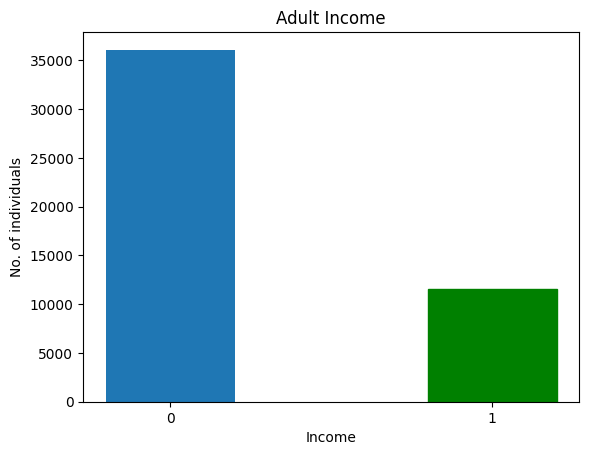

In [ ]:
barlist = plt.bar([str(0),str(1)], data2['Y'].value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Income")
plt.ylabel("No. of individuals")
plt.title("Adult Income")
plt.show()

# Full Dataset:

## DNN Classification Algorithm:

In [ ]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate_ml(model, X_train, X_test, y_train, y_test, domain):

    # time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)

    # conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # ## To deactivate after!!! ----------------------------------------
    # ##### Plot ROC curve and Confusion Matrix side by side
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # # ROC Curve
    # ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    # ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # ax1.set_xlabel('False Positive Rate')
    # ax1.set_ylabel('True Positive Rate')
    # ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    # ax1.legend(loc='lower right')
    # ax1.grid()

    # # Confusion Matrix
    # conf_disp.plot(ax=ax2, cmap='Blues')
    # ax2.set_title('Confusion Matrix')
    # plt.tight_layout()
    # plt.show()
    ## To deactivate after!!! ----------------------------------------

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    return fpr, tnr, fnr, tpr


In [ ]:
X_cleaned = data2.iloc[:, :-1]
y_cleaned = data2.iloc[:, -1]

scaler = MinMaxScaler()
scaler.fit(X_cleaned)
X_scaled = scaler.transform(X_cleaned)
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.20, random_state=0)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (38096, 13)
y_train: (38096,)
X_test: (9525, 13)
y_test: (9525,)


In [ ]:
## Establishing the Under/Oversampling values and imbalance ratio:

undersample_size = min(data_train.iloc[:,-1].value_counts())
oversample_size = max(data_train.iloc[:,-1].value_counts())


data_majority = data_train[data_train.iloc[:,-1]==0]
data_minority = data_train[data_train.iloc[:,-1]==1]

print(undersample_size)
print(oversample_size)

9242
28854


## Imbalanced (Original) data:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    model_source = create_dnn_model(X_train.shape[1])
    result_imbalanced = train_and_evaluate_ml(model_source, X_train, X_test, y_train, y_test, "Source")
    # result_TL_imbalanced = Transductive_TL(model_source, X_T_full, y_T_full, "Target")

    FPR.append(result_imbalanced[0])
    TNR.append(result_imbalanced[1])
    FNR.append(result_imbalanced[2])
    TPR.append(result_imbalanced[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7632 - loss: 0.4625 - val_AUC: 0.8952 - val_loss: 0.3380
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8956 - loss: 0.3363 - val_AUC: 0.8976 - val_loss: 0.3410
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8931 - loss: 0.3408 - val_AUC: 0.8993 - val_loss: 0.3360
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8969 - loss: 0.3323 - val_AUC: 0.9006 - val_loss: 0.3310
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9023 - loss: 0.3249 - val_AUC: 0.9000 - val_loss: 0.3397
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8983 - loss: 0.3328 - val_AUC: 0.9015 - val_loss: 0.3294
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8992 - loss: 0.3307 - val_AUC: 0.9014 - val_loss: 0.3273
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9028 - loss: 0.3274 - val_AUC: 0.9020 - val_loss: 0.3291
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9019 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7628 - loss: 0.4643 - val_AUC: 0.8942 - val_loss: 0.3386
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8933 - loss: 0.3377 - val_AUC: 0.8993 - val_loss: 0.3617
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8955 - loss: 0.3369 - val_AUC: 0.8997 - val_loss: 0.3295
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3290 - val_AUC: 0.9001 - val_loss: 0.3302
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8963 - loss: 0.3330 - val_AUC: 0.8998 - val_loss: 0.3291
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9015 - loss: 0.3262 - val_AUC: 0.9020 - val_loss: 0.3354
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9027 - loss: 0.3257 - val_AUC: 0.9020 - val_loss: 0.3258
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9004 - loss: 0.3282 - val_AUC: 0.9024 - val_loss: 0.3310
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8989 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7724 - loss: 0.4577 - val_AUC: 0.8957 - val_loss: 0.3368
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8946 - loss: 0.3403 - val_AUC: 0.8980 - val_loss: 0.3394
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8992 - loss: 0.3300 - val_AUC: 0.8987 - val_loss: 0.3318
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8999 - loss: 0.3258 - val_AUC: 0.9007 - val_loss: 0.3326
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9002 - loss: 0.3294 - val_AUC: 0.9009 - val_loss: 0.3331
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9012 - loss: 0.3259 - val_AUC: 0.9003 - val_loss: 0.3278
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9027 - loss: 0.3227 - val_AUC: 0.8992 - val_loss: 0.3335
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9034 - loss: 0.3236 - val_AUC: 0.9015 - val_loss: 0.3365
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9055 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7686 - loss: 0.4591 - val_AUC: 0.8932 - val_loss: 0.3507
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8913 - loss: 0.3416 - val_AUC: 0.8984 - val_loss: 0.3319
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8953 - loss: 0.3378 - val_AUC: 0.8991 - val_loss: 0.3325
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8981 - loss: 0.3333 - val_AUC: 0.8992 - val_loss: 0.3298
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8977 - loss: 0.3308 - val_AUC: 0.9004 - val_loss: 0.3352
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9027 - loss: 0.3239 - val_AUC: 0.9017 - val_loss: 0.3367
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9017 - loss: 0.3269 - val_AUC: 0.9012 - val_loss: 0.3291
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3279 - val_AUC: 0.9017 - val_loss: 0.3275
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9024 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7558 - loss: 0.4641 - val_AUC: 0.8929 - val_loss: 0.3419
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8909 - loss: 0.3414 - val_AUC: 0.8978 - val_loss: 0.3330
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8945 - loss: 0.3407 - val_AUC: 0.8995 - val_loss: 0.3302
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8973 - loss: 0.3329 - val_AUC: 0.9008 - val_loss: 0.3277
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8997 - loss: 0.3317 - val_AUC: 0.9013 - val_loss: 0.3276
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9012 - loss: 0.3244 - val_AUC: 0.9010 - val_loss: 0.3298
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8970 - loss: 0.3316 - val_AUC: 0.9015 - val_loss: 0.3269
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9008 - loss: 0.3288 - val_AUC: 0.9026 - val_loss: 0.3251
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9057 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7516 - loss: 0.4776 - val_AUC: 0.8897 - val_loss: 0.3674
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8866 - loss: 0.3451 - val_AUC: 0.8960 - val_loss: 0.3443
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8954 - loss: 0.3317 - val_AUC: 0.8975 - val_loss: 0.3444
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8988 - loss: 0.3311 - val_AUC: 0.8998 - val_loss: 0.3297
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8997 - loss: 0.3302 - val_AUC: 0.9002 - val_loss: 0.3293
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8976 - loss: 0.3309 - val_AUC: 0.9000 - val_loss: 0.3331
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8993 - loss: 0.3311 - val_AUC: 0.9012 - val_loss: 0.3289
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9000 - loss: 0.3265 - val_AUC: 0.9016 - val_loss: 0.3288
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9015 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7460 - loss: 0.4736 - val_AUC: 0.8958 - val_loss: 0.3398
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8952 - loss: 0.3354 - val_AUC: 0.8982 - val_loss: 0.3363
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8991 - loss: 0.3321 - val_AUC: 0.8990 - val_loss: 0.3466
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8967 - loss: 0.3348 - val_AUC: 0.9002 - val_loss: 0.3372
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9001 - loss: 0.3283 - val_AUC: 0.9005 - val_loss: 0.3299
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8996 - loss: 0.3304 - val_AUC: 0.9009 - val_loss: 0.3280
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9024 - loss: 0.3222 - val_AUC: 0.9019 - val_loss: 0.3280
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9021 - loss: 0.3255 - val_AUC: 0.9017 - val_loss: 0.3435
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9020 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7550 - loss: 0.4633 - val_AUC: 0.8944 - val_loss: 0.3384
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8933 - loss: 0.3383 - val_AUC: 0.8997 - val_loss: 0.3343
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8967 - loss: 0.3350 - val_AUC: 0.8998 - val_loss: 0.3295
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 - loss: 0.3323 - val_AUC: 0.8999 - val_loss: 0.3357
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3284 - val_AUC: 0.9014 - val_loss: 0.3274
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8992 - loss: 0.3304 - val_AUC: 0.9022 - val_loss: 0.3257
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9016 - loss: 0.3270 - val_AUC: 0.9018 - val_loss: 0.3269
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3296 - val_AUC: 0.9032 - val_loss: 0.3271
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9046 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7484 - loss: 0.4713 - val_AUC: 0.8940 - val_loss: 0.3409
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8902 - loss: 0.3448 - val_AUC: 0.8963 - val_loss: 0.3347
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8937 - loss: 0.3391 - val_AUC: 0.8971 - val_loss: 0.3393
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8992 - loss: 0.3264 - val_AUC: 0.8989 - val_loss: 0.3317
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8991 - loss: 0.3292 - val_AUC: 0.8997 - val_loss: 0.3327
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8993 - loss: 0.3288 - val_AUC: 0.8987 - val_loss: 0.3399
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9004 - loss: 0.3269 - val_AUC: 0.9007 - val_loss: 0.3284
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8994 - loss: 0.3307 - val_AUC: 0.9019 - val_loss: 0.3263
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9025 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7358 - loss: 0.4787 - val_AUC: 0.8938 - val_loss: 0.3401
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8921 - loss: 0.3394 - val_AUC: 0.8967 - val_loss: 0.3378
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8919 - loss: 0.3371 - val_AUC: 0.8983 - val_loss: 0.3359
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8964 - loss: 0.3330 - val_AUC: 0.8996 - val_loss: 0.3297
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8970 - loss: 0.3312 - val_AUC: 0.8997 - val_loss: 0.3293
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8980 - loss: 0.3300 - val_AUC: 0.9000 - val_loss: 0.3298
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9020 - loss: 0.3232 - val_AUC: 0.9007 - val_loss: 0.3307
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8981 - loss: 0.3315 - val_AUC: 0.9008 - val_loss: 0.3281
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9023 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.7593 - loss: 0.4629 - val_AUC: 0.8951 - val_loss: 0.3518
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8908 - loss: 0.3416 - val_AUC: 0.8979 - val_loss: 0.3329
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8979 - loss: 0.3308 - val_AUC: 0.8991 - val_loss: 0.3347
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8938 - loss: 0.3360 - val_AUC: 0.9002 - val_loss: 0.3336
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8978 - loss: 0.3316 - val_AUC: 0.9001 - val_loss: 0.3294
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8939 - loss: 0.3370 - val_AUC: 0.9001 - val_loss: 0.3289
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9057 - loss: 0.3183 - val_AUC: 0.9014 - val_loss: 0.3267
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9015 - loss: 0.3258 - val_AUC: 0.9010 - val_loss: 0.3273
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9031 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7493 - loss: 0.4690 - val_AUC: 0.8940 - val_loss: 0.3389
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8939 - loss: 0.3357 - val_AUC: 0.8991 - val_loss: 0.3315
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8975 - loss: 0.3311 - val_AUC: 0.8989 - val_loss: 0.3305
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9016 - loss: 0.3257 - val_AUC: 0.8996 - val_loss: 0.3296
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3251 - val_AUC: 0.9004 - val_loss: 0.3284
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3288 - val_AUC: 0.9007 - val_loss: 0.3280
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9015 - loss: 0.3295 - val_AUC: 0.9012 - val_loss: 0.3370
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9001 - loss: 0.3283 - val_AUC: 0.9003 - val_loss: 0.3403
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9013 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7373 - loss: 0.4784 - val_AUC: 0.8935 - val_loss: 0.3393
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8905 - loss: 0.3426 - val_AUC: 0.8979 - val_loss: 0.3340
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8961 - loss: 0.3309 - val_AUC: 0.8983 - val_loss: 0.3319
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8962 - loss: 0.3318 - val_AUC: 0.9013 - val_loss: 0.3272
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8982 - loss: 0.3304 - val_AUC: 0.9013 - val_loss: 0.3277
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9040 - loss: 0.3219 - val_AUC: 0.9014 - val_loss: 0.3264
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9024 - loss: 0.3234 - val_AUC: 0.9012 - val_loss: 0.3347
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8996 - loss: 0.3263 - val_AUC: 0.9032 - val_loss: 0.3322
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9042 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7499 - loss: 0.4693 - val_AUC: 0.8937 - val_loss: 0.3435
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8934 - loss: 0.3407 - val_AUC: 0.8963 - val_loss: 0.3357
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8942 - loss: 0.3381 - val_AUC: 0.9003 - val_loss: 0.3324
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3270 - val_AUC: 0.9014 - val_loss: 0.3304
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9008 - loss: 0.3285 - val_AUC: 0.9004 - val_loss: 0.3390
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9009 - loss: 0.3258 - val_AUC: 0.9021 - val_loss: 0.3424
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9006 - loss: 0.3280 - val_AUC: 0.9017 - val_loss: 0.3334
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9022 - loss: 0.3260 - val_AUC: 0.9023 - val_loss: 0.3289
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8968 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7601 - loss: 0.4646 - val_AUC: 0.8942 - val_loss: 0.3391
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8914 - loss: 0.3417 - val_AUC: 0.8967 - val_loss: 0.3415
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8934 - loss: 0.3355 - val_AUC: 0.8984 - val_loss: 0.3406
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8981 - loss: 0.3319 - val_AUC: 0.8995 - val_loss: 0.3339
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3289 - val_AUC: 0.8988 - val_loss: 0.3313
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9015 - loss: 0.3253 - val_AUC: 0.9008 - val_loss: 0.3341
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9024 - loss: 0.3240 - val_AUC: 0.9018 - val_loss: 0.3278
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9048 - loss: 0.3229 - val_AUC: 0.9014 - val_loss: 0.3294
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8994 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7303 - loss: 0.4745 - val_AUC: 0.8947 - val_loss: 0.3397
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8909 - loss: 0.3420 - val_AUC: 0.8984 - val_loss: 0.3334
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8956 - loss: 0.3354 - val_AUC: 0.8998 - val_loss: 0.3297
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8989 - loss: 0.3316 - val_AUC: 0.9002 - val_loss: 0.3291
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8938 - loss: 0.3339 - val_AUC: 0.9001 - val_loss: 0.3322
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8991 - loss: 0.3298 - val_AUC: 0.9022 - val_loss: 0.3275
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9009 - loss: 0.3278 - val_AUC: 0.9014 - val_loss: 0.3321
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8998 - loss: 0.3286 - val_AUC: 0.9021 - val_loss: 0.3264
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8994 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - AUC: 0.7618 - loss: 0.4620 - val_AUC: 0.8932 - val_loss: 0.3430
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8909 - loss: 0.3438 - val_AUC: 0.8980 - val_loss: 0.3359
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8940 - loss: 0.3363 - val_AUC: 0.8978 - val_loss: 0.3327
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3282 - val_AUC: 0.8993 - val_loss: 0.3361
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9026 - loss: 0.3237 - val_AUC: 0.8999 - val_loss: 0.3308
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8996 - loss: 0.3283 - val_AUC: 0.9000 - val_loss: 0.3379
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8998 - loss: 0.3287 - val_AUC: 0.9007 - val_loss: 0.3278
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8989 - loss: 0.3300 - val_AUC: 0.9010 - val_loss: 0.3276
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8964 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7337 - loss: 0.4747 - val_AUC: 0.8950 - val_loss: 0.3400
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8894 - loss: 0.3408 - val_AUC: 0.8991 - val_loss: 0.3322
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8975 - loss: 0.3316 - val_AUC: 0.8993 - val_loss: 0.3306
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8978 - loss: 0.3311 - val_AUC: 0.9002 - val_loss: 0.3310
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8969 - loss: 0.3332 - val_AUC: 0.9002 - val_loss: 0.3341
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9005 - loss: 0.3313 - val_AUC: 0.9012 - val_loss: 0.3277
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9007 - loss: 0.3265 - val_AUC: 0.9003 - val_loss: 0.3416
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8977 - loss: 0.3322 - val_AUC: 0.8991 - val_loss: 0.3318
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7598 - loss: 0.4635 - val_AUC: 0.8938 - val_loss: 0.3395
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8906 - loss: 0.3410 - val_AUC: 0.8975 - val_loss: 0.3365
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8959 - loss: 0.3363 - val_AUC: 0.8983 - val_loss: 0.3325
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8961 - loss: 0.3347 - val_AUC: 0.8992 - val_loss: 0.3376
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8949 - loss: 0.3376 - val_AUC: 0.8996 - val_loss: 0.3370
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.8985 - loss: 0.3310 - val_AUC: 0.9011 - val_loss: 0.3276
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9013 - loss: 0.3253 - val_AUC: 0.9019 - val_loss: 0.3368
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9018 - loss: 0.3259 - val_AUC: 0.9015 - val_loss: 0.3271
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9013 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7498 - loss: 0.4725 - val_AUC: 0.8944 - val_loss: 0.3424
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8911 - loss: 0.3418 - val_AUC: 0.8955 - val_loss: 0.3362
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8973 - loss: 0.3312 - val_AUC: 0.8983 - val_loss: 0.3424
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8978 - loss: 0.3313 - val_AUC: 0.8996 - val_loss: 0.3301
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8966 - loss: 0.3347 - val_AUC: 0.8996 - val_loss: 0.3299
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8989 - loss: 0.3333 - val_AUC: 0.9008 - val_loss: 0.3308
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9010 - loss: 0.3246 - val_AUC: 0.9010 - val_loss: 0.3280
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9029 - loss: 0.3261 - val_AUC: 0.9001 - val_loss: 0.3344
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9011 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7595 - loss: 0.4638 - val_AUC: 0.8961 - val_loss: 0.3363
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8894 - loss: 0.3435 - val_AUC: 0.8973 - val_loss: 0.3387
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8992 - loss: 0.3266 - val_AUC: 0.8997 - val_loss: 0.3300
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9013 - loss: 0.3251 - val_AUC: 0.9003 - val_loss: 0.3287
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8992 - loss: 0.3290 - val_AUC: 0.8996 - val_loss: 0.3307
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9012 - loss: 0.3229 - val_AUC: 0.8995 - val_loss: 0.3296
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9026 - loss: 0.3243 - val_AUC: 0.9011 - val_loss: 0.3305
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9012 - loss: 0.3266 - val_AUC: 0.9009 - val_loss: 0.3412
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9014 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.7494 - loss: 0.4763 - val_AUC: 0.8933 - val_loss: 0.3458
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8916 - loss: 0.3430 - val_AUC: 0.8984 - val_loss: 0.3343
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8942 - loss: 0.3385 - val_AUC: 0.8996 - val_loss: 0.3413
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8980 - loss: 0.3315 - val_AUC: 0.8992 - val_loss: 0.3313
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8997 - loss: 0.3277 - val_AUC: 0.9005 - val_loss: 0.3288
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8990 - loss: 0.3272 - val_AUC: 0.9010 - val_loss: 0.3334
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8993 - loss: 0.3319 - val_AUC: 0.9018 - val_loss: 0.3267
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9005 - loss: 0.3261 - val_AUC: 0.9021 - val_loss: 0.3284
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9014 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7521 - loss: 0.4647 - val_AUC: 0.8933 - val_loss: 0.3405
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8924 - loss: 0.3429 - val_AUC: 0.8970 - val_loss: 0.3344
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8949 - loss: 0.3365 - val_AUC: 0.8986 - val_loss: 0.3420
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9012 - loss: 0.3285 - val_AUC: 0.8982 - val_loss: 0.3339
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8983 - loss: 0.3305 - val_AUC: 0.8995 - val_loss: 0.3303
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9015 - loss: 0.3246 - val_AUC: 0.9005 - val_loss: 0.3282
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8985 - loss: 0.3307 - val_AUC: 0.9005 - val_loss: 0.3281
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9010 - loss: 0.3288 - val_AUC: 0.9011 - val_loss: 0.3279
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9004 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7510 - loss: 0.4693 - val_AUC: 0.8949 - val_loss: 0.3401
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8882 - loss: 0.3446 - val_AUC: 0.8982 - val_loss: 0.3338
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8980 - loss: 0.3292 - val_AUC: 0.8998 - val_loss: 0.3302
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8998 - loss: 0.3298 - val_AUC: 0.9006 - val_loss: 0.3282
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8987 - loss: 0.3305 - val_AUC: 0.8996 - val_loss: 0.3299
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9022 - loss: 0.3250 - val_AUC: 0.8998 - val_loss: 0.3291
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8988 - loss: 0.3322 - val_AUC: 0.9003 - val_loss: 0.3296
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9059 - loss: 0.3197 - val_AUC: 0.9004 - val_loss: 0.3280
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9000 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7603 - loss: 0.4605 - val_AUC: 0.8964 - val_loss: 0.3412
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8921 - loss: 0.3395 - val_AUC: 0.8984 - val_loss: 0.3331
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8935 - loss: 0.3367 - val_AUC: 0.8979 - val_loss: 0.3350
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 - loss: 0.3288 - val_AUC: 0.8994 - val_loss: 0.3305
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8991 - loss: 0.3319 - val_AUC: 0.9011 - val_loss: 0.3285
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8993 - loss: 0.3304 - val_AUC: 0.9017 - val_loss: 0.3277
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9021 - loss: 0.3229 - val_AUC: 0.9023 - val_loss: 0.3257
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9023 - loss: 0.3268 - val_AUC: 0.9009 - val_loss: 0.3286
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8996 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7514 - loss: 0.4672 - val_AUC: 0.8941 - val_loss: 0.3389
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8941 - loss: 0.3362 - val_AUC: 0.8986 - val_loss: 0.3315
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8982 - loss: 0.3332 - val_AUC: 0.8993 - val_loss: 0.3297
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8942 - loss: 0.3379 - val_AUC: 0.8995 - val_loss: 0.3373
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8977 - loss: 0.3311 - val_AUC: 0.9005 - val_loss: 0.3285
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8994 - loss: 0.3296 - val_AUC: 0.9011 - val_loss: 0.3271
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9021 - loss: 0.3252 - val_AUC: 0.9021 - val_loss: 0.3261
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9038 - loss: 0.3198 - val_AUC: 0.9012 - val_loss: 0.3274
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9025 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7380 - loss: 0.4831 - val_AUC: 0.8964 - val_loss: 0.3428
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8907 - loss: 0.3402 - val_AUC: 0.8978 - val_loss: 0.3329
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8953 - loss: 0.3353 - val_AUC: 0.8977 - val_loss: 0.3337
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8980 - loss: 0.3304 - val_AUC: 0.8988 - val_loss: 0.3304
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 - loss: 0.3297 - val_AUC: 0.9008 - val_loss: 0.3281
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9020 - loss: 0.3271 - val_AUC: 0.9004 - val_loss: 0.3291
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9005 - loss: 0.3291 - val_AUC: 0.9007 - val_loss: 0.3324
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9033 - loss: 0.3216 - val_AUC: 0.9023 - val_loss: 0.3441
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9030 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7427 - loss: 0.4737 - val_AUC: 0.8943 - val_loss: 0.3421
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8924 - loss: 0.3417 - val_AUC: 0.8979 - val_loss: 0.3370
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8974 - loss: 0.3339 - val_AUC: 0.8988 - val_loss: 0.3310
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9001 - loss: 0.3261 - val_AUC: 0.9002 - val_loss: 0.3303
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9016 - loss: 0.3254 - val_AUC: 0.9016 - val_loss: 0.3275
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9004 - loss: 0.3284 - val_AUC: 0.9014 - val_loss: 0.3271
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8971 - loss: 0.3310 - val_AUC: 0.9020 - val_loss: 0.3271
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3303 - val_AUC: 0.9022 - val_loss: 0.3269
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9023 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7782 - loss: 0.4492 - val_AUC: 0.8946 - val_loss: 0.3409
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8897 - loss: 0.3448 - val_AUC: 0.8974 - val_loss: 0.3337
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8973 - loss: 0.3298 - val_AUC: 0.8992 - val_loss: 0.3336
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9007 - loss: 0.3293 - val_AUC: 0.8995 - val_loss: 0.3306
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 - loss: 0.3302 - val_AUC: 0.8997 - val_loss: 0.3311
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8993 - loss: 0.3265 - val_AUC: 0.8997 - val_loss: 0.3321
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9031 - loss: 0.3233 - val_AUC: 0.9013 - val_loss: 0.3272
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9049 - loss: 0.3185 - val_AUC: 0.9018 - val_loss: 0.3279
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9007 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7556 - loss: 0.4703 - val_AUC: 0.8941 - val_loss: 0.3536
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8901 - loss: 0.3433 - val_AUC: 0.8964 - val_loss: 0.3562
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8966 - loss: 0.3354 - val_AUC: 0.8975 - val_loss: 0.3338
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8973 - loss: 0.3316 - val_AUC: 0.8994 - val_loss: 0.3469
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3292 - val_AUC: 0.8998 - val_loss: 0.3292
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9024 - loss: 0.3275 - val_AUC: 0.9000 - val_loss: 0.3291
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8982 - loss: 0.3315 - val_AUC: 0.9010 - val_loss: 0.3288
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9023 - loss: 0.3241 - val_AUC: 0.9016 - val_loss: 0.3273
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8982 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7635 - loss: 0.4626 - val_AUC: 0.8956 - val_loss: 0.3424
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8919 - loss: 0.3398 - val_AUC: 0.8969 - val_loss: 0.3337
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8975 - loss: 0.3293 - val_AUC: 0.9000 - val_loss: 0.3310
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9014 - loss: 0.3251 - val_AUC: 0.9002 - val_loss: 0.3294
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8974 - loss: 0.3315 - val_AUC: 0.8993 - val_loss: 0.3310
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9005 - loss: 0.3292 - val_AUC: 0.9016 - val_loss: 0.3341
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9007 - loss: 0.3274 - val_AUC: 0.9018 - val_loss: 0.3262
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9013 - loss: 0.3258 - val_AUC: 0.9031 - val_loss: 0.3267
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9013 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7281 - loss: 0.4829 - val_AUC: 0.8954 - val_loss: 0.3377
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8884 - loss: 0.3458 - val_AUC: 0.8991 - val_loss: 0.3306
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8954 - loss: 0.3374 - val_AUC: 0.8987 - val_loss: 0.3318
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8993 - loss: 0.3293 - val_AUC: 0.9003 - val_loss: 0.3309
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8975 - loss: 0.3315 - val_AUC: 0.9003 - val_loss: 0.3291
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9022 - loss: 0.3226 - val_AUC: 0.9011 - val_loss: 0.3281
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9038 - loss: 0.3217 - val_AUC: 0.9015 - val_loss: 0.3266
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9038 - loss: 0.3202 - val_AUC: 0.9013 - val_loss: 0.3275
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9060 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7412 - loss: 0.4777 - val_AUC: 0.8966 - val_loss: 0.3405
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8950 - loss: 0.3362 - val_AUC: 0.8992 - val_loss: 0.3375
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8947 - loss: 0.3390 - val_AUC: 0.9007 - val_loss: 0.3315
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8964 - loss: 0.3337 - val_AUC: 0.9011 - val_loss: 0.3282
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8987 - loss: 0.3321 - val_AUC: 0.9016 - val_loss: 0.3277
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9008 - loss: 0.3272 - val_AUC: 0.9011 - val_loss: 0.3290
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9012 - loss: 0.3268 - val_AUC: 0.9015 - val_loss: 0.3287
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9006 - loss: 0.3266 - val_AUC: 0.9019 - val_loss: 0.3269
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9042 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7550 - loss: 0.4706 - val_AUC: 0.8918 - val_loss: 0.3447
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8884 - loss: 0.3447 - val_AUC: 0.8966 - val_loss: 0.3356
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8946 - loss: 0.3376 - val_AUC: 0.8991 - val_loss: 0.3428
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8935 - loss: 0.3375 - val_AUC: 0.8997 - val_loss: 0.3524
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8969 - loss: 0.3318 - val_AUC: 0.9001 - val_loss: 0.3323
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9026 - loss: 0.3279 - val_AUC: 0.9003 - val_loss: 0.3303
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8998 - loss: 0.3267 - val_AUC: 0.9018 - val_loss: 0.3325
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9006 - loss: 0.3294 - val_AUC: 0.9005 - val_loss: 0.3287
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.9029 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7608 - loss: 0.4607 - val_AUC: 0.8933 - val_loss: 0.3395
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8894 - loss: 0.3427 - val_AUC: 0.8972 - val_loss: 0.3332
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8904 - loss: 0.3389 - val_AUC: 0.8986 - val_loss: 0.3339
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8990 - loss: 0.3285 - val_AUC: 0.8990 - val_loss: 0.3304
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8999 - loss: 0.3283 - val_AUC: 0.9003 - val_loss: 0.3314
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9017 - loss: 0.3262 - val_AUC: 0.8999 - val_loss: 0.3393
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9033 - loss: 0.3228 - val_AUC: 0.9007 - val_loss: 0.3301
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8999 - loss: 0.3271 - val_AUC: 0.9007 - val_loss: 0.3302
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9061 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7518 - loss: 0.4688 - val_AUC: 0.8927 - val_loss: 0.3413
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8921 - loss: 0.3386 - val_AUC: 0.8978 - val_loss: 0.3333
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8943 - loss: 0.3344 - val_AUC: 0.8990 - val_loss: 0.3323
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8976 - loss: 0.3289 - val_AUC: 0.9001 - val_loss: 0.3290
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8976 - loss: 0.3315 - val_AUC: 0.9008 - val_loss: 0.3276
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9002 - loss: 0.3303 - val_AUC: 0.9013 - val_loss: 0.3267
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9011 - loss: 0.3277 - val_AUC: 0.9016 - val_loss: 0.3286
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9020 - loss: 0.3246 - val_AUC: 0.9013 - val_loss: 0.3311
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9029 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7654 - loss: 0.4598 - val_AUC: 0.8947 - val_loss: 0.3399
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8910 - loss: 0.3424 - val_AUC: 0.8981 - val_loss: 0.3343
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8992 - loss: 0.3315 - val_AUC: 0.8990 - val_loss: 0.3304
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8964 - loss: 0.3331 - val_AUC: 0.9002 - val_loss: 0.3286
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8981 - loss: 0.3341 - val_AUC: 0.9012 - val_loss: 0.3291
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8957 - loss: 0.3360 - val_AUC: 0.9012 - val_loss: 0.3276
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8974 - loss: 0.3304 - val_AUC: 0.9015 - val_loss: 0.3282
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9020 - loss: 0.3277 - val_AUC: 0.9021 - val_loss: 0.3268
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8989 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7346 - loss: 0.4829 - val_AUC: 0.8945 - val_loss: 0.3451
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8942 - loss: 0.3400 - val_AUC: 0.8968 - val_loss: 0.3343
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8950 - loss: 0.3356 - val_AUC: 0.8977 - val_loss: 0.3465
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8966 - loss: 0.3347 - val_AUC: 0.8976 - val_loss: 0.3340
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8947 - loss: 0.3375 - val_AUC: 0.9007 - val_loss: 0.3299
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9006 - loss: 0.3278 - val_AUC: 0.9009 - val_loss: 0.3294
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.9002 - loss: 0.3276 - val_AUC: 0.9012 - val_loss: 0.3270
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9018 - loss: 0.3262 - val_AUC: 0.9018 - val_loss: 0.3305
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9034 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7634 - loss: 0.4628 - val_AUC: 0.8947 - val_loss: 0.3391
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8936 - loss: 0.3391 - val_AUC: 0.8974 - val_loss: 0.3482
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8942 - loss: 0.3375 - val_AUC: 0.8980 - val_loss: 0.3389
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8982 - loss: 0.3316 - val_AUC: 0.8987 - val_loss: 0.3327
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8935 - loss: 0.3373 - val_AUC: 0.8978 - val_loss: 0.3323
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9007 - loss: 0.3265 - val_AUC: 0.9004 - val_loss: 0.3301
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9022 - loss: 0.3216 - val_AUC: 0.9016 - val_loss: 0.3290
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9017 - loss: 0.3252 - val_AUC: 0.9018 - val_loss: 0.3274
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9052 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7502 - loss: 0.4693 - val_AUC: 0.8946 - val_loss: 0.3388
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8927 - loss: 0.3429 - val_AUC: 0.8982 - val_loss: 0.3342
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8920 - loss: 0.3388 - val_AUC: 0.8987 - val_loss: 0.3335
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8974 - loss: 0.3325 - val_AUC: 0.8989 - val_loss: 0.3336
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8997 - loss: 0.3281 - val_AUC: 0.8984 - val_loss: 0.3369
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8996 - loss: 0.3270 - val_AUC: 0.9007 - val_loss: 0.3281
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9009 - loss: 0.3275 - val_AUC: 0.9024 - val_loss: 0.3291
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9010 - loss: 0.3254 - val_AUC: 0.9015 - val_loss: 0.3303
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9026 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.7407 - loss: 0.4779 - val_AUC: 0.8931 - val_loss: 0.3591
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8920 - loss: 0.3374 - val_AUC: 0.8977 - val_loss: 0.3348
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8940 - loss: 0.3327 - val_AUC: 0.8992 - val_loss: 0.3307
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8953 - loss: 0.3351 - val_AUC: 0.9003 - val_loss: 0.3285
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8995 - loss: 0.3307 - val_AUC: 0.9008 - val_loss: 0.3277
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8964 - loss: 0.3345 - val_AUC: 0.9014 - val_loss: 0.3277
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8992 - loss: 0.3293 - val_AUC: 0.9006 - val_loss: 0.3285
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9011 - loss: 0.3257 - val_AUC: 0.9023 - val_loss: 0.3275
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9031 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7461 - loss: 0.4755 - val_AUC: 0.8955 - val_loss: 0.3391
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8917 - loss: 0.3428 - val_AUC: 0.8969 - val_loss: 0.3368
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8954 - loss: 0.3352 - val_AUC: 0.8985 - val_loss: 0.3349
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8968 - loss: 0.3308 - val_AUC: 0.8987 - val_loss: 0.3392
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9020 - loss: 0.3260 - val_AUC: 0.9008 - val_loss: 0.3313
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9003 - loss: 0.3289 - val_AUC: 0.9007 - val_loss: 0.3290
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8990 - loss: 0.3303 - val_AUC: 0.8999 - val_loss: 0.3296
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8999 - loss: 0.3264 - val_AUC: 0.9009 - val_loss: 0.3270
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9039 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7623 - loss: 0.4659 - val_AUC: 0.8952 - val_loss: 0.3424
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8937 - loss: 0.3368 - val_AUC: 0.8980 - val_loss: 0.3514
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8927 - loss: 0.3413 - val_AUC: 0.8979 - val_loss: 0.3376
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8983 - loss: 0.3321 - val_AUC: 0.8983 - val_loss: 0.3330
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9016 - loss: 0.3266 - val_AUC: 0.8992 - val_loss: 0.3321
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8986 - loss: 0.3315 - val_AUC: 0.8989 - val_loss: 0.3422
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9004 - loss: 0.3295 - val_AUC: 0.9020 - val_loss: 0.3382
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9018 - loss: 0.3258 - val_AUC: 0.9021 - val_loss: 0.3289
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9011 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7198 - loss: 0.4847 - val_AUC: 0.8937 - val_loss: 0.3472
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8892 - loss: 0.3427 - val_AUC: 0.8972 - val_loss: 0.3403
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8920 - loss: 0.3392 - val_AUC: 0.8983 - val_loss: 0.3321
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8995 - loss: 0.3305 - val_AUC: 0.8996 - val_loss: 0.3302
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8946 - loss: 0.3361 - val_AUC: 0.9002 - val_loss: 0.3309
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8968 - loss: 0.3345 - val_AUC: 0.8985 - val_loss: 0.3359
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8999 - loss: 0.3263 - val_AUC: 0.9006 - val_loss: 0.3405
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8989 - loss: 0.3305 - val_AUC: 0.8997 - val_loss: 0.3298
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8963 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7672 - loss: 0.4544 - val_AUC: 0.8962 - val_loss: 0.3389
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8899 - loss: 0.3432 - val_AUC: 0.8972 - val_loss: 0.3357
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8938 - loss: 0.3377 - val_AUC: 0.8981 - val_loss: 0.3443
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8959 - loss: 0.3345 - val_AUC: 0.8999 - val_loss: 0.3317
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8982 - loss: 0.3298 - val_AUC: 0.8998 - val_loss: 0.3312
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9026 - loss: 0.3269 - val_AUC: 0.8996 - val_loss: 0.3352
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9004 - loss: 0.3290 - val_AUC: 0.9009 - val_loss: 0.3297
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8997 - loss: 0.3257 - val_AUC: 0.9021 - val_loss: 0.3256
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9006 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7474 - loss: 0.4701 - val_AUC: 0.8926 - val_loss: 0.3415
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8866 - loss: 0.3475 - val_AUC: 0.8987 - val_loss: 0.3323
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8966 - loss: 0.3357 - val_AUC: 0.8992 - val_loss: 0.3313
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8977 - loss: 0.3340 - val_AUC: 0.9010 - val_loss: 0.3299
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8965 - loss: 0.3333 - val_AUC: 0.9008 - val_loss: 0.3283
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9002 - loss: 0.3269 - val_AUC: 0.9005 - val_loss: 0.3293
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9020 - loss: 0.3222 - val_AUC: 0.9014 - val_loss: 0.3308
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8977 - loss: 0.3316 - val_AUC: 0.9014 - val_loss: 0.3323
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9015 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7525 - loss: 0.4654 - val_AUC: 0.8936 - val_loss: 0.3419
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8919 - loss: 0.3427 - val_AUC: 0.8971 - val_loss: 0.3335
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8957 - loss: 0.3343 - val_AUC: 0.8985 - val_loss: 0.3340
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9016 - loss: 0.3251 - val_AUC: 0.8998 - val_loss: 0.3303
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8998 - loss: 0.3312 - val_AUC: 0.8999 - val_loss: 0.3289
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8970 - loss: 0.3325 - val_AUC: 0.9003 - val_loss: 0.3285
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8980 - loss: 0.3318 - val_AUC: 0.9020 - val_loss: 0.3327
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9042 - loss: 0.3210 - val_AUC: 0.9017 - val_loss: 0.3307
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9006 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.7680 - loss: 0.4633 - val_AUC: 0.8941 - val_loss: 0.3507
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8934 - loss: 0.3365 - val_AUC: 0.8974 - val_loss: 0.3471
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8968 - loss: 0.3314 - val_AUC: 0.8982 - val_loss: 0.3350
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8944 - loss: 0.3400 - val_AUC: 0.9006 - val_loss: 0.3283
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8994 - loss: 0.3298 - val_AUC: 0.9005 - val_loss: 0.3286
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8997 - loss: 0.3315 - val_AUC: 0.9012 - val_loss: 0.3273
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9034 - loss: 0.3248 - val_AUC: 0.9007 - val_loss: 0.3377
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8997 - loss: 0.3310 - val_AUC: 0.9020 - val_loss: 0.3263
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9023 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7409 - loss: 0.4755 - val_AUC: 0.8944 - val_loss: 0.3431
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8919 - loss: 0.3415 - val_AUC: 0.8968 - val_loss: 0.3366
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8955 - loss: 0.3375 - val_AUC: 0.8983 - val_loss: 0.3373
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9000 - loss: 0.3284 - val_AUC: 0.8987 - val_loss: 0.3406
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8989 - loss: 0.3311 - val_AUC: 0.9001 - val_loss: 0.3292
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9032 - loss: 0.3236 - val_AUC: 0.9012 - val_loss: 0.3304
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8966 - loss: 0.3342 - val_AUC: 0.9015 - val_loss: 0.3303
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8982 - loss: 0.3301 - val_AUC: 0.9023 - val_loss: 0.3253
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9038 -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.7575 - loss: 0.4634 - val_AUC: 0.8935 - val_loss: 0.3407
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8912 - loss: 0.3404 - val_AUC: 0.8985 - val_loss: 0.3394
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8962 - loss: 0.3365 - val_AUC: 0.8992 - val_loss: 0.3309
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8978 - loss: 0.3299 - val_AUC: 0.9003 - val_loss: 0.3289
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8951 - loss: 0.3349 - val_AUC: 0.9001 - val_loss: 0.3293
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8995 - loss: 0.3280 - val_AUC: 0.9011 - val_loss: 0.3281
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9033 - loss: 0.3247 - val_AUC: 0.9022 - val_loss: 0.3273
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9012 - loss: 0.3260 - val_AUC: 0.9031 - val_loss: 0.3253
Epoch 9/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9014 -

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Imbalanced.csv')

         FPR       TPR       FNR       TNR
0   0.049543  0.535885  0.464115  0.950457
1   0.064489  0.583732  0.416268  0.935511
2   0.068087  0.600261  0.399739  0.931913
3   0.076944  0.626359  0.373641  0.923056
4   0.057293  0.571988  0.428012  0.942707
5   0.066980  0.598521  0.401479  0.933020
6   0.073208  0.617225  0.382775  0.926792
7   0.040410  0.498913  0.501087  0.959590
8   0.096872  0.671161  0.328839  0.903128
9   0.068918  0.599826  0.400174  0.931082
10  0.080681  0.628534  0.371466  0.919319
11  0.053003  0.548499  0.451501  0.946997
12  0.047329  0.527621  0.472379  0.952671
13  0.064905  0.594606  0.405394  0.935095
14  0.078467  0.623314  0.376686  0.921533
15  0.066980  0.598521  0.401479  0.933020
16  0.071547  0.611570  0.388430  0.928453
17  0.091198  0.662027  0.337973  0.908802
18  0.081650  0.632884  0.367116  0.918350
19  0.076806  0.625489  0.374511  0.923194
20  0.053280  0.544585  0.455415  0.946720
21  0.069887  0.611135  0.388865  0.930113
22  0.13783

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.4071683340582862
StDev FNR: 0.04977321968988384


# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS_train = data_SRS_RUS.iloc[:, :-1]
    y_SRS_train = data_SRS_RUS.iloc[:, -1]
    model_SRS = create_dnn_model(X_SRS_train.shape[1])
    result_SRS = train_and_evaluate_ml(model_SRS, X_SRS_train, X_test, y_SRS_train, y_test, "Source")

    FPR.append(result_SRS[0])
    TNR.append(result_SRS[1])
    FNR.append(result_SRS[2])
    TPR.append(result_SRS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7134 - loss: 0.5887 - val_AUC: 0.0000e+00 - val_loss: 0.5056
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8770 - loss: 0.4253 - val_AUC: 0.0000e+00 - val_loss: 0.5036
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8895 - loss: 0.4008 - val_AUC: 0.0000e+00 - val_loss: 0.6402
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8938 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.6564
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8923 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.3841
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9018 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.7400
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9043 - loss: 0.3716 - val_AUC: 0.0000e+00 - val_loss: 0.4965
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.5084
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7399 - loss: 0.5733 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8764 - loss: 0.4254 - val_AUC: 0.0000e+00 - val_loss: 0.5557
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8916 - loss: 0.3957 - val_AUC: 0.0000e+00 - val_loss: 0.4081
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8919 - loss: 0.3958 - val_AUC: 0.0000e+00 - val_loss: 0.4991
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.4526
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8983 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5817
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.4600
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8971 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.5143
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7486 - loss: 0.5694 - val_AUC: 0.0000e+00 - val_loss: 0.4432
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8696 - loss: 0.4323 - val_AUC: 0.0000e+00 - val_loss: 0.4439
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8887 - loss: 0.4029 - val_AUC: 0.0000e+00 - val_loss: 0.4831
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8924 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5303
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8968 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.6320
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.6586
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8940 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.6965
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.6533
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7561 - loss: 0.5629 - val_AUC: 0.0000e+00 - val_loss: 0.7038
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8802 - loss: 0.4173 - val_AUC: 0.0000e+00 - val_loss: 0.5726
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8946 - loss: 0.3944 - val_AUC: 0.0000e+00 - val_loss: 0.5266
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4827
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8991 - loss: 0.3853 - val_AUC: 0.0000e+00 - val_loss: 0.5464
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8985 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4755
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8973 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.6849
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8940 - loss: 0.3957 - val_AUC: 0.0000e+00 - val_loss: 0.4695
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7136 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.6687
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8831 - loss: 0.4159 - val_AUC: 0.0000e+00 - val_loss: 0.6691
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8935 - loss: 0.3950 - val_AUC: 0.0000e+00 - val_loss: 0.4024
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8977 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.4982
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5769
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8966 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.6000
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.3937
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.5239
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7462 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.5803
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8744 - loss: 0.4282 - val_AUC: 0.0000e+00 - val_loss: 0.6005
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8885 - loss: 0.4027 - val_AUC: 0.0000e+00 - val_loss: 0.6110
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8921 - loss: 0.3954 - val_AUC: 0.0000e+00 - val_loss: 0.5631
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.5721
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.6668
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8971 - loss: 0.3890 - val_AUC: 0.0000e+00 - val_loss: 0.4701
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8983 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.5116
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7236 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.5222
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8837 - loss: 0.4132 - val_AUC: 0.0000e+00 - val_loss: 0.4996
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8912 - loss: 0.3972 - val_AUC: 0.0000e+00 - val_loss: 0.5542
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8964 - loss: 0.3901 - val_AUC: 0.0000e+00 - val_loss: 0.6693
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8963 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.6346
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9027 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.5184
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9021 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.5233
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9027 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.4376
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7292 - loss: 0.5759 - val_AUC: 0.0000e+00 - val_loss: 0.4972
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8789 - loss: 0.4206 - val_AUC: 0.0000e+00 - val_loss: 0.5236
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.4187
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9015 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.6478
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.5166
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3897 - val_AUC: 0.0000e+00 - val_loss: 0.4742
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9024 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.6426
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.5480
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7474 - loss: 0.5710 - val_AUC: 0.0000e+00 - val_loss: 0.4992
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8725 - loss: 0.4293 - val_AUC: 0.0000e+00 - val_loss: 0.5553
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8891 - loss: 0.4016 - val_AUC: 0.0000e+00 - val_loss: 0.4513
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8910 - loss: 0.3978 - val_AUC: 0.0000e+00 - val_loss: 0.6169
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.5206
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8997 - loss: 0.3819 - val_AUC: 0.0000e+00 - val_loss: 0.5100
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5199
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9010 - loss: 0.3800 - val_AUC: 0.0000e+00 - val_loss: 0.6473
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7504 - loss: 0.5719 - val_AUC: 0.0000e+00 - val_loss: 0.5930
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8855 - loss: 0.4111 - val_AUC: 0.0000e+00 - val_loss: 0.6519
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8927 - loss: 0.3949 - val_AUC: 0.0000e+00 - val_loss: 0.3249
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.5391
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.4471
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9010 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5289
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.4545
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9015 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.5711
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7367 - loss: 0.5739 - val_AUC: 0.0000e+00 - val_loss: 0.6300
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8846 - loss: 0.4140 - val_AUC: 0.0000e+00 - val_loss: 0.5599
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8920 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.6738
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8929 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.5995
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8986 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5618
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8983 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.6054
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8981 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5239
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.4157
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7396 - loss: 0.5734 - val_AUC: 0.0000e+00 - val_loss: 0.7220
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8673 - loss: 0.4357 - val_AUC: 0.0000e+00 - val_loss: 0.5782
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8877 - loss: 0.4024 - val_AUC: 0.0000e+00 - val_loss: 0.4657
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8917 - loss: 0.3991 - val_AUC: 0.0000e+00 - val_loss: 0.4949
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8984 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.6170
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8957 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.4944
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.4417
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3901 - val_AUC: 0.0000e+00 - val_loss: 0.3679
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7300 - loss: 0.5769 - val_AUC: 0.0000e+00 - val_loss: 0.7110
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8837 - loss: 0.4111 - val_AUC: 0.0000e+00 - val_loss: 0.5395
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8920 - loss: 0.3978 - val_AUC: 0.0000e+00 - val_loss: 0.4078
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8942 - loss: 0.3933 - val_AUC: 0.0000e+00 - val_loss: 0.4926
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8962 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.4387
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8956 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.4986
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.4794
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8973 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5016
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7587 - loss: 0.5640 - val_AUC: 0.0000e+00 - val_loss: 0.8078
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8836 - loss: 0.4148 - val_AUC: 0.0000e+00 - val_loss: 0.4305
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8911 - loss: 0.3992 - val_AUC: 0.0000e+00 - val_loss: 0.4614
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8941 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8957 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.4744
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.6081
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.4959
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8975 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4888
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7500 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.5213
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8832 - loss: 0.4149 - val_AUC: 0.0000e+00 - val_loss: 0.5092
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.5571
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.6406
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9006 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.5848
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8989 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.3710
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9013 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.5472
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.4494
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7412 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.5255
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8803 - loss: 0.4173 - val_AUC: 0.0000e+00 - val_loss: 0.5598
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5092
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.5227
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.3753
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.4960
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9017 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.6261
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.6143
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7151 - loss: 0.5766 - val_AUC: 0.0000e+00 - val_loss: 0.5498
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8811 - loss: 0.4172 - val_AUC: 0.0000e+00 - val_loss: 0.5312
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8891 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.4978
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5125
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8899 - loss: 0.3996 - val_AUC: 0.0000e+00 - val_loss: 0.4862
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9013 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.6304
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8961 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.4611
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3839 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.7437 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.5808
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8888 - loss: 0.4060 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8902 - loss: 0.3979 - val_AUC: 0.0000e+00 - val_loss: 0.6225
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8913 - loss: 0.3957 - val_AUC: 0.0000e+00 - val_loss: 0.6324
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8928 - loss: 0.3933 - val_AUC: 0.0000e+00 - val_loss: 0.6458
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.5079
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9013 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.4712
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9003 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.6228
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7254 - loss: 0.5808 - val_AUC: 0.0000e+00 - val_loss: 0.5327
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8812 - loss: 0.4184 - val_AUC: 0.0000e+00 - val_loss: 0.4873
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8872 - loss: 0.4057 - val_AUC: 0.0000e+00 - val_loss: 0.4505
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8921 - loss: 0.3961 - val_AUC: 0.0000e+00 - val_loss: 0.6789
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.5661
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4838
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.6134
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8962 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.6499
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7286 - loss: 0.5786 - val_AUC: 0.0000e+00 - val_loss: 0.5248
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8825 - loss: 0.4166 - val_AUC: 0.0000e+00 - val_loss: 0.5184
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8934 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.5789
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8936 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.5888
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9020 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.5700
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5635
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8947 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.4817
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8970 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.5432
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7637 - loss: 0.5611 - val_AUC: 0.0000e+00 - val_loss: 0.5839
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8880 - loss: 0.4066 - val_AUC: 0.0000e+00 - val_loss: 0.4170
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8940 - loss: 0.3932 - val_AUC: 0.0000e+00 - val_loss: 0.5108
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9008 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.6003
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.6096
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4116
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.3988
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8982 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.5263
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7363 - loss: 0.5762 - val_AUC: 0.0000e+00 - val_loss: 0.4708
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8799 - loss: 0.4200 - val_AUC: 0.0000e+00 - val_loss: 0.5101
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3902 - val_AUC: 0.0000e+00 - val_loss: 0.5479
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5681
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9025 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.5366
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9006 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5566
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8993 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.5457
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9068 - loss: 0.3714 - val_AUC: 0.0000e+00 - val_loss: 0.4987
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7329 - loss: 0.5749 - val_AUC: 0.0000e+00 - val_loss: 0.4563
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8771 - loss: 0.4223 - val_AUC: 0.0000e+00 - val_loss: 0.6414
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8939 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.6195
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8973 - loss: 0.3856 - val_AUC: 0.0000e+00 - val_loss: 0.5140
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9017 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.5015
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9014 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.4276
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8977 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.5901
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9038 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.5680
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7290 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.6794
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8752 - loss: 0.4261 - val_AUC: 0.0000e+00 - val_loss: 0.5072
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8870 - loss: 0.4009 - val_AUC: 0.0000e+00 - val_loss: 0.6456
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8954 - loss: 0.3904 - val_AUC: 0.0000e+00 - val_loss: 0.5752
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8957 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.5569
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8948 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.4566
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8972 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.5173
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8984 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.5639
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7286 - loss: 0.5744 - val_AUC: 0.0000e+00 - val_loss: 0.3862
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8830 - loss: 0.4153 - val_AUC: 0.0000e+00 - val_loss: 0.4382
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8929 - loss: 0.3961 - val_AUC: 0.0000e+00 - val_loss: 0.5316
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9012 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.6023
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.4786
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5448
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9040 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.5557
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8968 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.5104
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7608 - loss: 0.5725 - val_AUC: 0.0000e+00 - val_loss: 0.7643
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8716 - loss: 0.4310 - val_AUC: 0.0000e+00 - val_loss: 0.5329
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8912 - loss: 0.3970 - val_AUC: 0.0000e+00 - val_loss: 0.4707
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8937 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.4871
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5933
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8900 - loss: 0.3984 - val_AUC: 0.0000e+00 - val_loss: 0.5698
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8972 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.6580
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9023 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5630
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7321 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.7206
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8802 - loss: 0.4177 - val_AUC: 0.0000e+00 - val_loss: 0.4753
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8996 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4848
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8979 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.6402
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8988 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4805
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.3887
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9033 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9052 - loss: 0.3740 - val_AUC: 0.0000e+00 - val_loss: 0.5207
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7459 - loss: 0.5688 - val_AUC: 0.0000e+00 - val_loss: 0.5273
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8825 - loss: 0.4152 - val_AUC: 0.0000e+00 - val_loss: 0.4167
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8941 - loss: 0.3961 - val_AUC: 0.0000e+00 - val_loss: 0.4005
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8993 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.6226
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.4996
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9011 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.6405
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8990 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.4156
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9021 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.5741
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7211 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_loss: 0.6365
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8796 - loss: 0.4196 - val_AUC: 0.0000e+00 - val_loss: 0.5872
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8891 - loss: 0.4010 - val_AUC: 0.0000e+00 - val_loss: 0.5704
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8936 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.7003
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5250
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8971 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.4284
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8953 - loss: 0.3900 - val_AUC: 0.0000e+00 - val_loss: 0.5387
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.4925
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7112 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.5249
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8723 - loss: 0.4288 - val_AUC: 0.0000e+00 - val_loss: 0.5297
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.5061
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8925 - loss: 0.3936 - val_AUC: 0.0000e+00 - val_loss: 0.5805
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8958 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5593
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9001 - loss: 0.3819 - val_AUC: 0.0000e+00 - val_loss: 0.6633
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8981 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5115
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9047 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.5778
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7384 - loss: 0.5740 - val_AUC: 0.0000e+00 - val_loss: 0.7487
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8776 - loss: 0.4222 - val_AUC: 0.0000e+00 - val_loss: 0.5052
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8947 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.5874
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8932 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5974
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8942 - loss: 0.3936 - val_AUC: 0.0000e+00 - val_loss: 0.5578
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9002 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5413
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8974 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.7018
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9006 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.4672
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7273 - loss: 0.5793 - val_AUC: 0.0000e+00 - val_loss: 0.3559
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8798 - loss: 0.4195 - val_AUC: 0.0000e+00 - val_loss: 0.5393
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8917 - loss: 0.3964 - val_AUC: 0.0000e+00 - val_loss: 0.7589
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8929 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5559
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8999 - loss: 0.3815 - val_AUC: 0.0000e+00 - val_loss: 0.5402
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8957 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.5937
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8936 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.4533
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8985 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.5822
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7395 - loss: 0.5748 - val_AUC: 0.0000e+00 - val_loss: 0.5421
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8754 - loss: 0.4271 - val_AUC: 0.0000e+00 - val_loss: 0.6480
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8905 - loss: 0.3974 - val_AUC: 0.0000e+00 - val_loss: 0.5352
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8957 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.4713
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8989 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.5155
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8962 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5374
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8919 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.4946
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7520 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8816 - loss: 0.4149 - val_AUC: 0.0000e+00 - val_loss: 0.5506
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8969 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.6620
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8926 - loss: 0.3944 - val_AUC: 0.0000e+00 - val_loss: 0.4935
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9028 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5584
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.5455
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8952 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.4824
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.7532
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7286 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.5981
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8821 - loss: 0.4192 - val_AUC: 0.0000e+00 - val_loss: 0.6123
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8948 - loss: 0.3937 - val_AUC: 0.0000e+00 - val_loss: 0.4444
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8955 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9001 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.6806
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9039 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.5049
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9005 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.4573
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9050 - loss: 0.3713 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7129 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.5638
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8797 - loss: 0.4198 - val_AUC: 0.0000e+00 - val_loss: 0.4607
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8896 - loss: 0.3998 - val_AUC: 0.0000e+00 - val_loss: 0.6108
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8967 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.6083
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8994 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.5403
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9001 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.4464
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9033 - loss: 0.3746 - val_AUC: 0.0000e+00 - val_loss: 0.4687
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9024 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.5056
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7367 - loss: 0.5754 - val_AUC: 0.0000e+00 - val_loss: 0.5273
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8793 - loss: 0.4191 - val_AUC: 0.0000e+00 - val_loss: 0.5430
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8890 - loss: 0.4006 - val_AUC: 0.0000e+00 - val_loss: 0.5459
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.4739
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.5612
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8952 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5060
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8978 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4448
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8981 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.6209
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7413 - loss: 0.5820 - val_AUC: 0.0000e+00 - val_loss: 0.5392
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8798 - loss: 0.4193 - val_AUC: 0.0000e+00 - val_loss: 0.4360
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8903 - loss: 0.4001 - val_AUC: 0.0000e+00 - val_loss: 0.5907
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8943 - loss: 0.3911 - val_AUC: 0.0000e+00 - val_loss: 0.5691
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8933 - loss: 0.3950 - val_AUC: 0.0000e+00 - val_loss: 0.5230
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8997 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5197
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.6476
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.6007
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6984 - loss: 0.5918 - val_AUC: 0.0000e+00 - val_loss: 0.5767
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8800 - loss: 0.4207 - val_AUC: 0.0000e+00 - val_loss: 0.5699
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8881 - loss: 0.4014 - val_AUC: 0.0000e+00 - val_loss: 0.4672
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8913 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.6515
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8963 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5479
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8927 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.5088
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8967 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.4881
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5998
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7323 - loss: 0.5741 - val_AUC: 0.0000e+00 - val_loss: 0.5344
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8849 - loss: 0.4103 - val_AUC: 0.0000e+00 - val_loss: 0.5262
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8940 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.3070
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8923 - loss: 0.3955 - val_AUC: 0.0000e+00 - val_loss: 0.4505
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9028 - loss: 0.3763 - val_AUC: 0.0000e+00 - val_loss: 0.4907
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8970 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.6757
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5410
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9012 - loss: 0.3761 - val_AUC: 0.0000e+00 - val_loss: 0.6602
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7244 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.7605
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8716 - loss: 0.4330 - val_AUC: 0.0000e+00 - val_loss: 0.4428
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8930 - loss: 0.3969 - val_AUC: 0.0000e+00 - val_loss: 0.5162
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8948 - loss: 0.3910 - val_AUC: 0.0000e+00 - val_loss: 0.5163
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8925 - loss: 0.3974 - val_AUC: 0.0000e+00 - val_loss: 0.5627
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8982 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.4565
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9006 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.4115
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.3616
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6844 - loss: 0.5948 - val_AUC: 0.0000e+00 - val_loss: 0.6777
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8747 - loss: 0.4240 - val_AUC: 0.0000e+00 - val_loss: 0.4728
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8933 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.5753
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3856 - val_AUC: 0.0000e+00 - val_loss: 0.4335
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8982 - loss: 0.3853 - val_AUC: 0.0000e+00 - val_loss: 0.4294
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.5466
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9005 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.4730
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.4563
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7492 - loss: 0.5659 - val_AUC: 0.0000e+00 - val_loss: 0.4770
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8749 - loss: 0.4257 - val_AUC: 0.0000e+00 - val_loss: 0.7207
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8892 - loss: 0.4003 - val_AUC: 0.0000e+00 - val_loss: 0.5643
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8883 - loss: 0.4015 - val_AUC: 0.0000e+00 - val_loss: 0.5392
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8944 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.3992
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8923 - loss: 0.3954 - val_AUC: 0.0000e+00 - val_loss: 0.4762
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8958 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.5646
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.4738
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7588 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.6304
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8805 - loss: 0.4168 - val_AUC: 0.0000e+00 - val_loss: 0.8187
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8889 - loss: 0.4050 - val_AUC: 0.0000e+00 - val_loss: 0.5361
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8951 - loss: 0.3904 - val_AUC: 0.0000e+00 - val_loss: 0.5317
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.4997
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9039 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.6069
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8966 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.6749
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8977 - loss: 0.3839 - val_AUC: 0.0000e+00 - val_loss: 0.5477
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7517 - loss: 0.5705 - val_AUC: 0.0000e+00 - val_loss: 0.5777
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8859 - loss: 0.4127 - val_AUC: 0.0000e+00 - val_loss: 0.5877
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.5528
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8986 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5083
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8968 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.6089
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9008 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.6084
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9004 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5107
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9039 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.5714
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7461 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.5911
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8849 - loss: 0.4124 - val_AUC: 0.0000e+00 - val_loss: 0.5351
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8917 - loss: 0.3982 - val_AUC: 0.0000e+00 - val_loss: 0.5293
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8924 - loss: 0.3961 - val_AUC: 0.0000e+00 - val_loss: 0.5576
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8975 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.5489
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.4489
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8936 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.6547
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8962 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.5433
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7180 - loss: 0.5855 - val_AUC: 0.0000e+00 - val_loss: 0.6511
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8785 - loss: 0.4206 - val_AUC: 0.0000e+00 - val_loss: 0.6010
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8909 - loss: 0.3986 - val_AUC: 0.0000e+00 - val_loss: 0.4453
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8908 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.5937
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8944 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.4748
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8936 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.4662
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8927 - loss: 0.3916 - val_AUC: 0.0000e+00 - val_loss: 0.5473
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8989 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.5493
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.6919 - loss: 0.5955 - val_AUC: 0.0000e+00 - val_loss: 0.3603
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8722 - loss: 0.4311 - val_AUC: 0.0000e+00 - val_loss: 0.5826
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8914 - loss: 0.3976 - val_AUC: 0.0000e+00 - val_loss: 0.5339
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8974 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.5145
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8999 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.6521
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8964 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.6076
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9001 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.4987
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9017 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.5549
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7289 - loss: 0.5772 - val_AUC: 0.0000e+00 - val_loss: 0.6358
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8877 - loss: 0.4096 - val_AUC: 0.0000e+00 - val_loss: 0.5257
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8948 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.6023
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9012 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.6377
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.4744
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8972 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.5720
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9036 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.6989
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9028 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.6248
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7402 - loss: 0.5763 - val_AUC: 0.0000e+00 - val_loss: 0.5723
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8810 - loss: 0.4193 - val_AUC: 0.0000e+00 - val_loss: 0.6383
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8931 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.4281
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8971 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.5305
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.4554
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8977 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5708
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9007 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.4712
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5008
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.081511  0.636799  0.363201  0.918489
1   0.170634  0.801653  0.198347  0.829366
2   0.142402  0.755111  0.244889  0.857598
3   0.133269  0.742497  0.257503  0.866731
4   0.115001  0.707699  0.292301  0.884999
5   0.146139  0.764680  0.235320  0.853861
6   0.158317  0.787299  0.212701  0.841683
7   0.119015  0.715094  0.284906  0.880985
8   0.184888  0.818182  0.181818  0.815112
9   0.110019  0.704654  0.295346  0.889981
10  0.109189  0.697695  0.302305  0.890811
11  0.142956  0.762070  0.237930  0.857044
12  0.097841  0.672901  0.327099  0.902159
13  0.163299  0.793388  0.206612  0.836701
14  0.160116  0.790344  0.209656  0.839884
15  0.125381  0.730318  0.269682  0.874619
16  0.121091  0.720748  0.279252  0.878909
17  0.134929  0.748586  0.251414  0.865071
18  0.127180  0.731187  0.268813  0.872820
19  0.108497  0.694215  0.305785  0.891503
20  0.103515  0.678556  0.321444  0.896485
21  0.131885  0.742062  0.257938  0.868115
22  0.13783

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2619834710743802
StDev FNR: 0.05118332240417845


## Simple Random Sampling with Replacement:

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRSwR_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRSwR_train = data_SRSwR_RUS.iloc[:, :-1]
    y_SRSwR_train = data_SRSwR_RUS.iloc[:, -1]
    model_SRSwR = create_dnn_model(X_SRSwR_train.shape[1])
    result_SRSwR = train_and_evaluate_ml(model_SRSwR, X_SRSwR_train, X_test, y_SRSwR_train, y_test, "Source")

    FPR.append(result_SRSwR[0])
    TNR.append(result_SRSwR[1])
    FNR.append(result_SRSwR[2])
    TPR.append(result_SRSwR[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7049 - loss: 0.5877 - val_AUC: 0.0000e+00 - val_loss: 0.4482
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8810 - loss: 0.4195 - val_AUC: 0.0000e+00 - val_loss: 0.5481
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8906 - loss: 0.3992 - val_AUC: 0.0000e+00 - val_loss: 0.5812
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3951 - val_AUC: 0.0000e+00 - val_loss: 0.4740
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8982 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.4365
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8961 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.5690
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8992 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.4826
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9006 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.4827
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7045 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.5608
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8845 - loss: 0.4148 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8924 - loss: 0.3956 - val_AUC: 0.0000e+00 - val_loss: 0.4983
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3890 - val_AUC: 0.0000e+00 - val_loss: 0.3723
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8971 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.6865
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8995 - loss: 0.3829 - val_AUC: 0.0000e+00 - val_loss: 0.6281
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9029 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.4517
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9056 - loss: 0.3716 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7517 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.4446
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8778 - loss: 0.4255 - val_AUC: 0.0000e+00 - val_loss: 0.4747
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8924 - loss: 0.3981 - val_AUC: 0.0000e+00 - val_loss: 0.5810
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8939 - loss: 0.3943 - val_AUC: 0.0000e+00 - val_loss: 0.4660
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8984 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.4704
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8993 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.4436
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.5877
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.6558
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7623 - loss: 0.5549 - val_AUC: 0.0000e+00 - val_loss: 0.5971
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8779 - loss: 0.4193 - val_AUC: 0.0000e+00 - val_loss: 0.6932
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8919 - loss: 0.3964 - val_AUC: 0.0000e+00 - val_loss: 0.6766
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8975 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.6565
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9011 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.4578
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9048 - loss: 0.3729 - val_AUC: 0.0000e+00 - val_loss: 0.5015
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.4243
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.7183
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7374 - loss: 0.5741 - val_AUC: 0.0000e+00 - val_loss: 0.8222
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8784 - loss: 0.4229 - val_AUC: 0.0000e+00 - val_loss: 0.4334
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8916 - loss: 0.4009 - val_AUC: 0.0000e+00 - val_loss: 0.5051
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.6684
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8944 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.4891
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8963 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.5762
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8954 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.4766
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.4174
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7258 - loss: 0.5795 - val_AUC: 0.0000e+00 - val_loss: 0.5273
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8769 - loss: 0.4264 - val_AUC: 0.0000e+00 - val_loss: 0.5373
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8895 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.4720
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8958 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.4845
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8947 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5623
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8940 - loss: 0.3920 - val_AUC: 0.0000e+00 - val_loss: 0.5376
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9015 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.5713
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8987 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.3637
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7299 - loss: 0.5794 - val_AUC: 0.0000e+00 - val_loss: 0.6134
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8830 - loss: 0.4172 - val_AUC: 0.0000e+00 - val_loss: 0.6164
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8924 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.6268
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8975 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5970
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.4809
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3919 - val_AUC: 0.0000e+00 - val_loss: 0.4577
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8987 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.4927
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9005 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5195
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7108 - loss: 0.5846 - val_AUC: 0.0000e+00 - val_loss: 0.5781
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8798 - loss: 0.4202 - val_AUC: 0.0000e+00 - val_loss: 0.4865
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3921 - val_AUC: 0.0000e+00 - val_loss: 0.5910
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8966 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.4800
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8988 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4843
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9008 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.5713
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8989 - loss: 0.3821 - val_AUC: 0.0000e+00 - val_loss: 0.4578
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9005 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5435
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7478 - loss: 0.5765 - val_AUC: 0.0000e+00 - val_loss: 0.5993
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8840 - loss: 0.4141 - val_AUC: 0.0000e+00 - val_loss: 0.5447
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8941 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.6192
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8896 - loss: 0.3993 - val_AUC: 0.0000e+00 - val_loss: 0.5626
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.5322
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.4790
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5813
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.4181
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7380 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.6039
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8828 - loss: 0.4131 - val_AUC: 0.0000e+00 - val_loss: 0.6697
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5328
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.4443
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.4908
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8966 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.6256
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8999 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.6257
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4778
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7475 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.7240
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8781 - loss: 0.4219 - val_AUC: 0.0000e+00 - val_loss: 0.4675
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8887 - loss: 0.4008 - val_AUC: 0.0000e+00 - val_loss: 0.6496
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8941 - loss: 0.3933 - val_AUC: 0.0000e+00 - val_loss: 0.4762
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5473
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.4966
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.5587
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8993 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5989
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7028 - loss: 0.5953 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8838 - loss: 0.4156 - val_AUC: 0.0000e+00 - val_loss: 0.5676
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8923 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5422
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.3944
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8991 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.6689
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9038 - loss: 0.3730 - val_AUC: 0.0000e+00 - val_loss: 0.5305
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9047 - loss: 0.3717 - val_AUC: 0.0000e+00 - val_loss: 0.5821
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9013 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.4350
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7535 - loss: 0.5685 - val_AUC: 0.0000e+00 - val_loss: 0.5681
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8777 - loss: 0.4231 - val_AUC: 0.0000e+00 - val_loss: 0.4838
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8887 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.5097
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.4697
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9059 - loss: 0.3716 - val_AUC: 0.0000e+00 - val_loss: 0.6169
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.5883
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9029 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.5718
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9048 - loss: 0.3720 - val_AUC: 0.0000e+00 - val_loss: 0.7407
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7414 - loss: 0.5666 - val_AUC: 0.0000e+00 - val_loss: 0.6323
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8817 - loss: 0.4159 - val_AUC: 0.0000e+00 - val_loss: 0.4637
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8878 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.4310
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3925 - val_AUC: 0.0000e+00 - val_loss: 0.4217
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8900 - loss: 0.3982 - val_AUC: 0.0000e+00 - val_loss: 0.5594
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3945 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.6335
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9024 - loss: 0.3778 - val_AUC: 0.0000e+00 - val_loss: 0.4965
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7135 - loss: 0.5950 - val_AUC: 0.0000e+00 - val_loss: 0.5926
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8719 - loss: 0.4317 - val_AUC: 0.0000e+00 - val_loss: 0.4917
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8856 - loss: 0.4073 - val_AUC: 0.0000e+00 - val_loss: 0.5042
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8944 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.5599
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8925 - loss: 0.3954 - val_AUC: 0.0000e+00 - val_loss: 0.5259
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8934 - loss: 0.3943 - val_AUC: 0.0000e+00 - val_loss: 0.3825
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8924 - loss: 0.3954 - val_AUC: 0.0000e+00 - val_loss: 0.4863
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9011 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.4391
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7355 - loss: 0.5758 - val_AUC: 0.0000e+00 - val_loss: 0.6319
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8840 - loss: 0.4139 - val_AUC: 0.0000e+00 - val_loss: 0.5151
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8935 - loss: 0.3945 - val_AUC: 0.0000e+00 - val_loss: 0.5169
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8982 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.6104
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8976 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.5068
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.4375
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9012 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.5188
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3790 - val_AUC: 0.0000e+00 - val_loss: 0.5103
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7451 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.5390
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8759 - loss: 0.4250 - val_AUC: 0.0000e+00 - val_loss: 0.4996
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3910 - val_AUC: 0.0000e+00 - val_loss: 0.6541
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.5203
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8993 - loss: 0.3818 - val_AUC: 0.0000e+00 - val_loss: 0.6331
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.5651
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.4646
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9058 - loss: 0.3718 - val_AUC: 0.0000e+00 - val_loss: 0.4952
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7558 - loss: 0.5691 - val_AUC: 0.0000e+00 - val_loss: 0.5637
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8791 - loss: 0.4239 - val_AUC: 0.0000e+00 - val_loss: 0.5943
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8950 - loss: 0.3904 - val_AUC: 0.0000e+00 - val_loss: 0.5104
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8935 - loss: 0.3924 - val_AUC: 0.0000e+00 - val_loss: 0.5140
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8941 - loss: 0.3919 - val_AUC: 0.0000e+00 - val_loss: 0.6020
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8955 - loss: 0.3896 - val_AUC: 0.0000e+00 - val_loss: 0.6457
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9026 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.5873
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7242 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.7441
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8757 - loss: 0.4263 - val_AUC: 0.0000e+00 - val_loss: 0.5313
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8940 - loss: 0.3944 - val_AUC: 0.0000e+00 - val_loss: 0.6295
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.5024
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8948 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.6291
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8989 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.5028
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8926 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.4155
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8929 - loss: 0.3930 - val_AUC: 0.0000e+00 - val_loss: 0.5540
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7479 - loss: 0.5698 - val_AUC: 0.0000e+00 - val_loss: 0.6356
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8804 - loss: 0.4178 - val_AUC: 0.0000e+00 - val_loss: 0.4364
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8911 - loss: 0.3977 - val_AUC: 0.0000e+00 - val_loss: 0.5402
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8906 - loss: 0.3973 - val_AUC: 0.0000e+00 - val_loss: 0.5451
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8983 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.4839
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8998 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5720
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9069 - loss: 0.3704 - val_AUC: 0.0000e+00 - val_loss: 0.5440
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5330
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7347 - loss: 0.5867 - val_AUC: 0.0000e+00 - val_loss: 0.6098
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8729 - loss: 0.4322 - val_AUC: 0.0000e+00 - val_loss: 0.6033
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8894 - loss: 0.4036 - val_AUC: 0.0000e+00 - val_loss: 0.4400
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.5300
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8966 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.5425
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8958 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.5537
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.4788
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8973 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.4336
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7576 - loss: 0.5656 - val_AUC: 0.0000e+00 - val_loss: 0.6280
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8769 - loss: 0.4230 - val_AUC: 0.0000e+00 - val_loss: 0.6428
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8862 - loss: 0.4056 - val_AUC: 0.0000e+00 - val_loss: 0.5344
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8925 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.7098
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8966 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.4186
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8972 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.5313
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8952 - loss: 0.3902 - val_AUC: 0.0000e+00 - val_loss: 0.7490
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8941 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5094
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.7502 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.7116
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8858 - loss: 0.4109 - val_AUC: 0.0000e+00 - val_loss: 0.6132
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8942 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.5504
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8991 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5230
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8988 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5623
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9022 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.4769
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8986 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.6287
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9002 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.6439
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6944 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.5743
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8797 - loss: 0.4230 - val_AUC: 0.0000e+00 - val_loss: 0.5554
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8868 - loss: 0.4060 - val_AUC: 0.0000e+00 - val_loss: 0.5859
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.5812
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8943 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.4950
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8986 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5031
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.5971
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9002 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.6956
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7550 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.5407
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8832 - loss: 0.4171 - val_AUC: 0.0000e+00 - val_loss: 0.5626
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8930 - loss: 0.3968 - val_AUC: 0.0000e+00 - val_loss: 0.7485
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3958 - val_AUC: 0.0000e+00 - val_loss: 0.5009
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8932 - loss: 0.3941 - val_AUC: 0.0000e+00 - val_loss: 0.5439
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9004 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.5751
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.5545
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.4874
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7187 - loss: 0.5874 - val_AUC: 0.0000e+00 - val_loss: 0.6433
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8638 - loss: 0.4420 - val_AUC: 0.0000e+00 - val_loss: 0.6182
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8954 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.5513
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8969 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.4731
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8979 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.4759
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8935 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.4263
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8996 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.4409
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7317 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.6168
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8809 - loss: 0.4193 - val_AUC: 0.0000e+00 - val_loss: 0.5980
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8919 - loss: 0.3949 - val_AUC: 0.0000e+00 - val_loss: 0.4214
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8942 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.5859
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8888 - loss: 0.4017 - val_AUC: 0.0000e+00 - val_loss: 0.6150
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8936 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5291
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.5146
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8966 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.4437
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7454 - loss: 0.5713 - val_AUC: 0.0000e+00 - val_loss: 0.3974
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8853 - loss: 0.4131 - val_AUC: 0.0000e+00 - val_loss: 0.8045
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8882 - loss: 0.4032 - val_AUC: 0.0000e+00 - val_loss: 0.4780
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3902 - val_AUC: 0.0000e+00 - val_loss: 0.5045
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.5567
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.6237
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9038 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4457
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9016 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.4793
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7262 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.7376
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8805 - loss: 0.4204 - val_AUC: 0.0000e+00 - val_loss: 0.4575
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8943 - loss: 0.3936 - val_AUC: 0.0000e+00 - val_loss: 0.6306
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8909 - loss: 0.3967 - val_AUC: 0.0000e+00 - val_loss: 0.5345
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9027 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.5354
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8969 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5051
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9018 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.4518
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9010 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.5030
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7493 - loss: 0.5603 - val_AUC: 0.0000e+00 - val_loss: 0.5510
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8747 - loss: 0.4251 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8962 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.5950
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8951 - loss: 0.3901 - val_AUC: 0.0000e+00 - val_loss: 0.4576
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8974 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.5502
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9034 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.6220
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9030 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.5421
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.4670
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7339 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.5687
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8778 - loss: 0.4212 - val_AUC: 0.0000e+00 - val_loss: 0.7344
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8932 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.6732
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.5661
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8870 - loss: 0.4039 - val_AUC: 0.0000e+00 - val_loss: 0.5063
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8956 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.4515
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.6645
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.6331
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7474 - loss: 0.5667 - val_AUC: 0.0000e+00 - val_loss: 0.6112
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8797 - loss: 0.4186 - val_AUC: 0.0000e+00 - val_loss: 0.4180
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8897 - loss: 0.3999 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3898 - val_AUC: 0.0000e+00 - val_loss: 0.5930
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8968 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.5776
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8935 - loss: 0.3924 - val_AUC: 0.0000e+00 - val_loss: 0.4626
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.5641
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8959 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5419
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7602 - loss: 0.5675 - val_AUC: 0.0000e+00 - val_loss: 0.5619
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8818 - loss: 0.4154 - val_AUC: 0.0000e+00 - val_loss: 0.5093
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8889 - loss: 0.4022 - val_AUC: 0.0000e+00 - val_loss: 0.5960
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8948 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.5087
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8953 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.4699
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5586
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.6412
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8976 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.5293
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7113 - loss: 0.5844 - val_AUC: 0.0000e+00 - val_loss: 0.6208
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8785 - loss: 0.4233 - val_AUC: 0.0000e+00 - val_loss: 0.8167
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8888 - loss: 0.4035 - val_AUC: 0.0000e+00 - val_loss: 0.4920
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8983 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.4340
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8978 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5465
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8962 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.4792
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.5550
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8999 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.7213
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7397 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.5514
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8880 - loss: 0.4096 - val_AUC: 0.0000e+00 - val_loss: 0.6037
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8905 - loss: 0.3997 - val_AUC: 0.0000e+00 - val_loss: 0.5990
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.4658
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8952 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.5060
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5319
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5232
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8982 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5074
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7344 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.5775
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8869 - loss: 0.4067 - val_AUC: 0.0000e+00 - val_loss: 0.6225
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8966 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.4336
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8996 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.6240
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9008 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.5401
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9002 - loss: 0.3821 - val_AUC: 0.0000e+00 - val_loss: 0.4628
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9046 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.5118
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8984 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.6109
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7322 - loss: 0.5703 - val_AUC: 0.0000e+00 - val_loss: 0.5931
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8704 - loss: 0.4330 - val_AUC: 0.0000e+00 - val_loss: 0.7134
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8910 - loss: 0.4001 - val_AUC: 0.0000e+00 - val_loss: 0.5588
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3896 - val_AUC: 0.0000e+00 - val_loss: 0.5072
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.5038
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.4930
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.4739
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8977 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5699
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7166 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.8323
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8748 - loss: 0.4269 - val_AUC: 0.0000e+00 - val_loss: 0.6649
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8898 - loss: 0.4010 - val_AUC: 0.0000e+00 - val_loss: 0.4881
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8959 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.5155
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8936 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.5704
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9008 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5118
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9012 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5447
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7475 - loss: 0.5764 - val_AUC: 0.0000e+00 - val_loss: 0.7678
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8854 - loss: 0.4098 - val_AUC: 0.0000e+00 - val_loss: 0.5872
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8896 - loss: 0.4007 - val_AUC: 0.0000e+00 - val_loss: 0.4785
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8912 - loss: 0.3983 - val_AUC: 0.0000e+00 - val_loss: 0.4535
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8999 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.5645
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9010 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.6277
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8948 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.5454
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9039 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.4859
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7209 - loss: 0.5813 - val_AUC: 0.0000e+00 - val_loss: 0.5119
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8734 - loss: 0.4299 - val_AUC: 0.0000e+00 - val_loss: 0.4650
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8938 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.6899
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8936 - loss: 0.3924 - val_AUC: 0.0000e+00 - val_loss: 0.4883
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.4792
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3896 - val_AUC: 0.0000e+00 - val_loss: 0.4908
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.6061
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5970
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7405 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.5768
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8856 - loss: 0.4099 - val_AUC: 0.0000e+00 - val_loss: 0.5914
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8901 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.6714
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9004 - loss: 0.3818 - val_AUC: 0.0000e+00 - val_loss: 0.3663
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.6472
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8984 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.5567
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.4789
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9040 - loss: 0.3741 - val_AUC: 0.0000e+00 - val_loss: 0.4955
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7453 - loss: 0.5704 - val_AUC: 0.0000e+00 - val_loss: 0.6070
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8901 - loss: 0.4031 - val_AUC: 0.0000e+00 - val_loss: 0.7133
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8934 - loss: 0.3939 - val_AUC: 0.0000e+00 - val_loss: 0.5355
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8973 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5698
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9024 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.6493
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8983 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.4673
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9031 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.4192
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9024 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.6251
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7190 - loss: 0.5839 - val_AUC: 0.0000e+00 - val_loss: 0.5694
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8823 - loss: 0.4163 - val_AUC: 0.0000e+00 - val_loss: 0.4706
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.5870
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8957 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.6197
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8920 - loss: 0.3964 - val_AUC: 0.0000e+00 - val_loss: 0.5452
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9021 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.5295
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9011 - loss: 0.3800 - val_AUC: 0.0000e+00 - val_loss: 0.5988
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.3557
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7436 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.5125
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8856 - loss: 0.4111 - val_AUC: 0.0000e+00 - val_loss: 0.4455
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.4602
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9023 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.6786
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8978 - loss: 0.3839 - val_AUC: 0.0000e+00 - val_loss: 0.5709
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9026 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.4644
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9029 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.4893
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9049 - loss: 0.3730 - val_AUC: 0.0000e+00 - val_loss: 0.4613
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7309 - loss: 0.5779 - val_AUC: 0.0000e+00 - val_loss: 0.5199
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8777 - loss: 0.4221 - val_AUC: 0.0000e+00 - val_loss: 0.7131
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8936 - loss: 0.3947 - val_AUC: 0.0000e+00 - val_loss: 0.4041
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8968 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.8272
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8951 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.4799
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9019 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.4909
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9010 - loss: 0.3778 - val_AUC: 0.0000e+00 - val_loss: 0.6106
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9050 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.5133
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7507 - loss: 0.5638 - val_AUC: 0.0000e+00 - val_loss: 0.5455
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8854 - loss: 0.4117 - val_AUC: 0.0000e+00 - val_loss: 0.4819
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8904 - loss: 0.3992 - val_AUC: 0.0000e+00 - val_loss: 0.4724
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.6590
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9027 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5212
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9006 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5424
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5386
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9009 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.4752
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7277 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.5544
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8863 - loss: 0.4126 - val_AUC: 0.0000e+00 - val_loss: 0.5541
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3941 - val_AUC: 0.0000e+00 - val_loss: 0.4500
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9005 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.5266
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8981 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.5529
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8995 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.6215
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.4963
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9018 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.7095
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7421 - loss: 0.5729 - val_AUC: 0.0000e+00 - val_loss: 0.4726
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8793 - loss: 0.4210 - val_AUC: 0.0000e+00 - val_loss: 0.4679
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8856 - loss: 0.4064 - val_AUC: 0.0000e+00 - val_loss: 0.4083
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8936 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.4407
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3896 - val_AUC: 0.0000e+00 - val_loss: 0.6201
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8937 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.4241
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9021 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5577
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.5647
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7564 - loss: 0.5727 - val_AUC: 0.0000e+00 - val_loss: 0.5991
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8872 - loss: 0.4088 - val_AUC: 0.0000e+00 - val_loss: 0.5905
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8920 - loss: 0.3960 - val_AUC: 0.0000e+00 - val_loss: 0.5582
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.5226
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9016 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.4631
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8974 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.6087
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8989 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.5839
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8991 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.5518
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7476 - loss: 0.5659 - val_AUC: 0.0000e+00 - val_loss: 0.4988
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8803 - loss: 0.4186 - val_AUC: 0.0000e+00 - val_loss: 0.6130
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8929 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.6004
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8964 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.4184
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8962 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.6559
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.5559
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8984 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.5953
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.5626
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRSwR_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.102685  0.678991  0.321009  0.897315
1   0.130916  0.738147  0.261853  0.869084
2   0.107252  0.688560  0.311440  0.892748
3   0.123028  0.725098  0.274902  0.876972
4   0.140188  0.757721  0.242279  0.859812
5   0.150291  0.773815  0.226185  0.849709
6   0.155826  0.785124  0.214876  0.844174
7   0.151813  0.773815  0.226185  0.848187
8   0.105314  0.695085  0.304915  0.894686
9   0.154581  0.780774  0.219226  0.845419
10  0.156657  0.786429  0.213571  0.843343
11  0.123858  0.725968  0.274032  0.876142
12  0.137697  0.748586  0.251414  0.862303
13  0.130363  0.730753  0.269247  0.869637
14  0.095073  0.670726  0.329274  0.904927
15  0.107390  0.691605  0.308395  0.892610
16  0.154027  0.780339  0.219661  0.845973
17  0.156241  0.779469  0.220531  0.843759
18  0.142126  0.754676  0.245324  0.857874
19  0.146554  0.767725  0.232275  0.853446
20  0.098118  0.675511  0.324489  0.901882
21  0.121782  0.722053  0.277947  0.878218
22  0.16634

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2625315354501957
StDev FNR: 0.051091045639594025


## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


k = oversample_size/undersample_size
print(k)

# np.random.seed(123)

for i in range(times):
    start = random.randint(1, int(k))
    # print(start)

    Row = []

    for j in range(undersample_size):
      row = start+int(k*j)-1
      Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :-1]
    y_Sy_train = data_Sy_RUS.iloc[:, -1]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



3.1220515040034624
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7413 - loss: 0.5745 - val_AUC: 0.0000e+00 - val_loss: 0.5666
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8794 - loss: 0.4191 - val_AUC: 0.0000e+00 - val_loss: 0.5877
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8913 - loss: 0.3983 - val_AUC: 0.0000e+00 - val_loss: 0.5906
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8911 - loss: 0.3967 - val_AUC: 0.0000e+00 - val_loss: 0.4830
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3951 - val_AUC: 0.0000e+00 - val_loss: 0.5358
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5172
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.4396
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7416 - loss: 0.5732 - val_AUC: 0.0000e+00 - val_loss: 0.6658
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8852 - loss: 0.4103 - val_AUC: 0.0000e+00 - val_loss: 0.6508
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8921 - loss: 0.3972 - val_AUC: 0.0000e+00 - val_loss: 0.5811
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.5703
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8932 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.7500
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9011 - loss: 0.3802 - val_AUC: 0.0000e+00 - val_loss: 0.6491
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9023 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.4707
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9066 - loss: 0.3678 - val_AUC: 0.0000e+00 - val_loss: 0.4491
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7225 - loss: 0.5892 - val_AUC: 0.0000e+00 - val_loss: 0.5073
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8818 - loss: 0.4199 - val_AUC: 0.0000e+00 - val_loss: 0.4924
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8911 - loss: 0.4004 - val_AUC: 0.0000e+00 - val_loss: 0.4660
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8934 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.4056
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8964 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.5882
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9001 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.6768
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5405
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9016 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.5875
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7565 - loss: 0.5663 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8875 - loss: 0.4073 - val_AUC: 0.0000e+00 - val_loss: 0.4939
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8959 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.3415
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9022 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.5489
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9041 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.4438
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.5758
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9040 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.6121
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7217 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.4058
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8841 - loss: 0.4140 - val_AUC: 0.0000e+00 - val_loss: 0.6004
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8951 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.5209
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9039 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.4024
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8988 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.4541
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9016 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.6719
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.5283
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9013 - loss: 0.3761 - val_AUC: 0.0000e+00 - val_loss: 0.4583
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7400 - loss: 0.5690 - val_AUC: 0.0000e+00 - val_loss: 0.7143
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8815 - loss: 0.4187 - val_AUC: 0.0000e+00 - val_loss: 0.6147
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8846 - loss: 0.4106 - val_AUC: 0.0000e+00 - val_loss: 0.6285
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3970 - val_AUC: 0.0000e+00 - val_loss: 0.4804
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8955 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5231
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8997 - loss: 0.3819 - val_AUC: 0.0000e+00 - val_loss: 0.4785
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8912 - loss: 0.3953 - val_AUC: 0.0000e+00 - val_loss: 0.4884
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8985 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.5527
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7294 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.7007
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8832 - loss: 0.4138 - val_AUC: 0.0000e+00 - val_loss: 0.5478
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9024 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.7154
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8873 - loss: 0.4041 - val_AUC: 0.0000e+00 - val_loss: 0.6403
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.7114
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9050 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.4364
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9001 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.4969
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8972 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.4653
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7453 - loss: 0.5725 - val_AUC: 0.0000e+00 - val_loss: 0.5793
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8777 - loss: 0.4221 - val_AUC: 0.0000e+00 - val_loss: 0.4530
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8889 - loss: 0.4017 - val_AUC: 0.0000e+00 - val_loss: 0.4925
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8914 - loss: 0.3955 - val_AUC: 0.0000e+00 - val_loss: 0.6195
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8927 - loss: 0.3952 - val_AUC: 0.0000e+00 - val_loss: 0.5674
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5450
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9000 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.5618
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9042 - loss: 0.3725 - val_AUC: 0.0000e+00 - val_loss: 0.4548
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7323 - loss: 0.5767 - val_AUC: 0.0000e+00 - val_loss: 0.5324
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8836 - loss: 0.4150 - val_AUC: 0.0000e+00 - val_loss: 0.5843
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8934 - loss: 0.3959 - val_AUC: 0.0000e+00 - val_loss: 0.6115
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3890 - val_AUC: 0.0000e+00 - val_loss: 0.5914
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.4904
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.5791
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9002 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5485
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3819 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7308 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_loss: 0.6241
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8791 - loss: 0.4211 - val_AUC: 0.0000e+00 - val_loss: 0.4627
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8928 - loss: 0.3951 - val_AUC: 0.0000e+00 - val_loss: 0.7042
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8972 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.3965
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.4092
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8959 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.4916
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8945 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.6157
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8989 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.6182
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7416 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.4361
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8766 - loss: 0.4244 - val_AUC: 0.0000e+00 - val_loss: 0.6679
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8934 - loss: 0.3947 - val_AUC: 0.0000e+00 - val_loss: 0.5503
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8930 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.5856
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8971 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5165
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.4808
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8953 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.5427
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.6236
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7586 - loss: 0.5703 - val_AUC: 0.0000e+00 - val_loss: 0.6329
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8772 - loss: 0.4223 - val_AUC: 0.0000e+00 - val_loss: 0.4901
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8962 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5480
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.5093
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9021 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.5548
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9008 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.4746
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9033 - loss: 0.3758 - val_AUC: 0.0000e+00 - val_loss: 0.5257
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.5102
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7297 - loss: 0.5796 - val_AUC: 0.0000e+00 - val_loss: 0.6529
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8798 - loss: 0.4211 - val_AUC: 0.0000e+00 - val_loss: 0.6794
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8948 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.4351
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8974 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5228
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8952 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.4798
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.4637
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8995 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.5891
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9014 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.5386
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7452 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.5624
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8838 - loss: 0.4152 - val_AUC: 0.0000e+00 - val_loss: 0.7921
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8943 - loss: 0.3930 - val_AUC: 0.0000e+00 - val_loss: 0.4394
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9005 - loss: 0.3828 - val_AUC: 0.0000e+00 - val_loss: 0.4824
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8974 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.6561
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.6069
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9023 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.5804
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.5794
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7373 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.5864
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8769 - loss: 0.4250 - val_AUC: 0.0000e+00 - val_loss: 0.4969
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8856 - loss: 0.4073 - val_AUC: 0.0000e+00 - val_loss: 0.6120
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.5387
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8951 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.4943
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8987 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5088
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.5771
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8928 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.4646
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7337 - loss: 0.5757 - val_AUC: 0.0000e+00 - val_loss: 0.6311
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8825 - loss: 0.4150 - val_AUC: 0.0000e+00 - val_loss: 0.3880
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8933 - loss: 0.3958 - val_AUC: 0.0000e+00 - val_loss: 0.4782
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.6676
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.4773
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.5329
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9006 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.4288
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8998 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.5010
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7653 - loss: 0.5610 - val_AUC: 0.0000e+00 - val_loss: 0.6497
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8782 - loss: 0.4225 - val_AUC: 0.0000e+00 - val_loss: 0.4475
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.4307
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8903 - loss: 0.4005 - val_AUC: 0.0000e+00 - val_loss: 0.4758
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8993 - loss: 0.3829 - val_AUC: 0.0000e+00 - val_loss: 0.5343
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8996 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.4660
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8954 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5129
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.4783
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7382 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.4789
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8849 - loss: 0.4108 - val_AUC: 0.0000e+00 - val_loss: 0.5508
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8903 - loss: 0.3997 - val_AUC: 0.0000e+00 - val_loss: 0.6408
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8942 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5530
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.4437
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9001 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.5659
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3815 - val_AUC: 0.0000e+00 - val_loss: 0.5388
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8991 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5319
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7235 - loss: 0.5824 - val_AUC: 0.0000e+00 - val_loss: 0.7047
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8756 - loss: 0.4257 - val_AUC: 0.0000e+00 - val_loss: 0.6751
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8943 - loss: 0.3943 - val_AUC: 0.0000e+00 - val_loss: 0.6389
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8953 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.5073
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5509
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8999 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.4977
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9026 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.4792
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9014 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5221
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7392 - loss: 0.5742 - val_AUC: 0.0000e+00 - val_loss: 0.4988
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8794 - loss: 0.4208 - val_AUC: 0.0000e+00 - val_loss: 0.6276
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8938 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.4136
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8947 - loss: 0.3932 - val_AUC: 0.0000e+00 - val_loss: 0.5718
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9002 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5876
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.5734
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.5172
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9031 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.6131
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7503 - loss: 0.5768 - val_AUC: 0.0000e+00 - val_loss: 0.4921
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8783 - loss: 0.4255 - val_AUC: 0.0000e+00 - val_loss: 0.5161
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8914 - loss: 0.3987 - val_AUC: 0.0000e+00 - val_loss: 0.6486
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.6021
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8985 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.6524
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8995 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.6141
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8988 - loss: 0.3813 - val_AUC: 0.0000e+00 - val_loss: 0.5578
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9027 - loss: 0.3755 - val_AUC: 0.0000e+00 - val_loss: 0.6231
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7369 - loss: 0.5749 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8806 - loss: 0.4179 - val_AUC: 0.0000e+00 - val_loss: 0.5243
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8905 - loss: 0.4010 - val_AUC: 0.0000e+00 - val_loss: 0.5176
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8932 - loss: 0.3958 - val_AUC: 0.0000e+00 - val_loss: 0.6481
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.4838
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8980 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4720
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8901 - loss: 0.3988 - val_AUC: 0.0000e+00 - val_loss: 0.4768
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3829 - val_AUC: 0.0000e+00 - val_loss: 0.4737
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7457 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.5421
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8841 - loss: 0.4144 - val_AUC: 0.0000e+00 - val_loss: 0.4968
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8862 - loss: 0.4057 - val_AUC: 0.0000e+00 - val_loss: 0.5140
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8993 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5078
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9006 - loss: 0.3813 - val_AUC: 0.0000e+00 - val_loss: 0.5672
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9039 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5490
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9001 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.6685
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.5794
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.6937 - loss: 0.5884 - val_AUC: 0.0000e+00 - val_loss: 0.4631
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8844 - loss: 0.4138 - val_AUC: 0.0000e+00 - val_loss: 0.6797
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8924 - loss: 0.3977 - val_AUC: 0.0000e+00 - val_loss: 0.5985
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9008 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.5023
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8926 - loss: 0.3936 - val_AUC: 0.0000e+00 - val_loss: 0.5991
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9068 - loss: 0.3701 - val_AUC: 0.0000e+00 - val_loss: 0.6248
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9007 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5621
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9028 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.5260
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7472 - loss: 0.5750 - val_AUC: 0.0000e+00 - val_loss: 0.5592
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8840 - loss: 0.4130 - val_AUC: 0.0000e+00 - val_loss: 0.4111
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5129
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5510
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8973 - loss: 0.3866 - val_AUC: 0.0000e+00 - val_loss: 0.4698
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9014 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.4849
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9023 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.5149
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9065 - loss: 0.3696 - val_AUC: 0.0000e+00 - val_loss: 0.5403
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7228 - loss: 0.5837 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8850 - loss: 0.4131 - val_AUC: 0.0000e+00 - val_loss: 0.4874
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8900 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.5218
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.3367
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.4777
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9011 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.5349
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8985 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.5553
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9010 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7407 - loss: 0.5707 - val_AUC: 0.0000e+00 - val_loss: 0.5895
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8807 - loss: 0.4159 - val_AUC: 0.0000e+00 - val_loss: 0.5453
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8898 - loss: 0.4012 - val_AUC: 0.0000e+00 - val_loss: 0.6302
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8920 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.5620
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8945 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.4575
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.6384
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.5654
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9017 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.4073
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7291 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.4848
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8837 - loss: 0.4133 - val_AUC: 0.0000e+00 - val_loss: 0.5524
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8936 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5648
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8951 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.5760
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9004 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5053
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.5022
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9029 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.4844
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8998 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.5626
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7590 - loss: 0.5570 - val_AUC: 0.0000e+00 - val_loss: 0.5200
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8856 - loss: 0.4077 - val_AUC: 0.0000e+00 - val_loss: 0.4989
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8969 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.3764
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8993 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.5116
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8930 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.5632
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.5449
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8988 - loss: 0.3823 - val_AUC: 0.0000e+00 - val_loss: 0.4842
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9003 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.6465
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7235 - loss: 0.5890 - val_AUC: 0.0000e+00 - val_loss: 0.5568
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8723 - loss: 0.4330 - val_AUC: 0.0000e+00 - val_loss: 0.5480
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8942 - loss: 0.3932 - val_AUC: 0.0000e+00 - val_loss: 0.4880
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8974 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.6268
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8963 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.4264
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9031 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.5228
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8988 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.4953
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.4509
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7065 - loss: 0.5849 - val_AUC: 0.0000e+00 - val_loss: 0.6348
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8863 - loss: 0.4088 - val_AUC: 0.0000e+00 - val_loss: 0.6241
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8961 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.4180
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.4719
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9030 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4432
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9042 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.4831
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9044 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5305
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9017 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5413
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7289 - loss: 0.5843 - val_AUC: 0.0000e+00 - val_loss: 0.5554
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8723 - loss: 0.4304 - val_AUC: 0.0000e+00 - val_loss: 0.4432
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5418
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.4282
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8955 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.4594
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9009 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.4751
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8950 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.7295
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9022 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5690
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7306 - loss: 0.5743 - val_AUC: 0.0000e+00 - val_loss: 0.5159
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8821 - loss: 0.4170 - val_AUC: 0.0000e+00 - val_loss: 0.6362
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8969 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5870
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8937 - loss: 0.3936 - val_AUC: 0.0000e+00 - val_loss: 0.6151
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8961 - loss: 0.3897 - val_AUC: 0.0000e+00 - val_loss: 0.6853
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9029 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.6156
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8986 - loss: 0.3821 - val_AUC: 0.0000e+00 - val_loss: 0.5843
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.6035
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7319 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.5732
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8847 - loss: 0.4121 - val_AUC: 0.0000e+00 - val_loss: 0.4623
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.5699
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.4719
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3938 - val_AUC: 0.0000e+00 - val_loss: 0.4407
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9007 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.4820
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8966 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.5670
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8931 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.5659
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7092 - loss: 0.5908 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8694 - loss: 0.4353 - val_AUC: 0.0000e+00 - val_loss: 0.5780
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8895 - loss: 0.3991 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.6710
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8961 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.4935
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.7449
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8998 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5211
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5703
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7402 - loss: 0.5660 - val_AUC: 0.0000e+00 - val_loss: 0.6478
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8773 - loss: 0.4233 - val_AUC: 0.0000e+00 - val_loss: 0.6950
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8915 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.6301
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.4768
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3943 - val_AUC: 0.0000e+00 - val_loss: 0.7536
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8932 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5858
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9022 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5704
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8993 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.6110
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7405 - loss: 0.5736 - val_AUC: 0.0000e+00 - val_loss: 0.5689
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8854 - loss: 0.4124 - val_AUC: 0.0000e+00 - val_loss: 0.4675
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8935 - loss: 0.3960 - val_AUC: 0.0000e+00 - val_loss: 0.5789
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8977 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.4735
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8990 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.6550
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8973 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.7005
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9035 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.4724
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8996 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.4661
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7074 - loss: 0.5875 - val_AUC: 0.0000e+00 - val_loss: 0.6733
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8719 - loss: 0.4343 - val_AUC: 0.0000e+00 - val_loss: 0.5193
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8919 - loss: 0.3975 - val_AUC: 0.0000e+00 - val_loss: 0.9057
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8902 - loss: 0.3975 - val_AUC: 0.0000e+00 - val_loss: 0.5093
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5683
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8947 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.5439
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3900 - val_AUC: 0.0000e+00 - val_loss: 0.4966
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8959 - loss: 0.3901 - val_AUC: 0.0000e+00 - val_loss: 0.5236
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7360 - loss: 0.5791 - val_AUC: 0.0000e+00 - val_loss: 0.7155
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8818 - loss: 0.4216 - val_AUC: 0.0000e+00 - val_loss: 0.5549
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8902 - loss: 0.3984 - val_AUC: 0.0000e+00 - val_loss: 0.4393
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8937 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.4898
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9004 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.3861
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8980 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5002
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8971 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.5799
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8936 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.4817
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7399 - loss: 0.5717 - val_AUC: 0.0000e+00 - val_loss: 0.7232
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8819 - loss: 0.4166 - val_AUC: 0.0000e+00 - val_loss: 0.5942
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.3929
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8976 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5094
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.4989
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.7504
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8975 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.4876
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9046 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5824
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7331 - loss: 0.5749 - val_AUC: 0.0000e+00 - val_loss: 0.5972
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8814 - loss: 0.4149 - val_AUC: 0.0000e+00 - val_loss: 0.5446
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8897 - loss: 0.3986 - val_AUC: 0.0000e+00 - val_loss: 0.5727
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.5486
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8929 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.4925
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.6310
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8986 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.5894
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3856 - val_AUC: 0.0000e+00 - val_loss: 0.7191
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7234 - loss: 0.5873 - val_AUC: 0.0000e+00 - val_loss: 0.7247
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8806 - loss: 0.4188 - val_AUC: 0.0000e+00 - val_loss: 0.4033
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8909 - loss: 0.3980 - val_AUC: 0.0000e+00 - val_loss: 0.4596
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3932 - val_AUC: 0.0000e+00 - val_loss: 0.5727
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8943 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.5433
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8961 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5746
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8952 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5488
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.5691
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - AUC: 0.7478 - loss: 0.5641 - val_AUC: 0.0000e+00 - val_loss: 0.6201
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8821 - loss: 0.4160 - val_AUC: 0.0000e+00 - val_loss: 0.6687
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8927 - loss: 0.3956 - val_AUC: 0.0000e+00 - val_loss: 0.7575
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8965 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.4935
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8970 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.6090
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8970 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.7158
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8984 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5341
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9027 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.6247
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.7379 - loss: 0.5756 - val_AUC: 0.0000e+00 - val_loss: 0.6535
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8897 - loss: 0.4044 - val_AUC: 0.0000e+00 - val_loss: 0.4708
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8967 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.4954
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9023 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5786
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8972 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.5902
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9017 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4375
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9020 - loss: 0.3802 - val_AUC: 0.0000e+00 - val_loss: 0.4689
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9004 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.6376
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7450 - loss: 0.5720 - val_AUC: 0.0000e+00 - val_loss: 0.5933
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8791 - loss: 0.4186 - val_AUC: 0.0000e+00 - val_loss: 0.5475
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8935 - loss: 0.3944 - val_AUC: 0.0000e+00 - val_loss: 0.4802
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8931 - loss: 0.3959 - val_AUC: 0.0000e+00 - val_loss: 0.4425
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9003 - loss: 0.3818 - val_AUC: 0.0000e+00 - val_loss: 0.5655
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9017 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.6246
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9024 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.4592
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9011 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.4023
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7107 - loss: 0.5898 - val_AUC: 0.0000e+00 - val_loss: 0.5969
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8860 - loss: 0.4126 - val_AUC: 0.0000e+00 - val_loss: 0.5711
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8919 - loss: 0.3978 - val_AUC: 0.0000e+00 - val_loss: 0.7291
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8960 - loss: 0.3900 - val_AUC: 0.0000e+00 - val_loss: 0.4514
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9031 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.4993
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9003 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.5732
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8983 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9053 - loss: 0.3716 - val_AUC: 0.0000e+00 - val_loss: 0.4352
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.7255 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.7512
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8760 - loss: 0.4273 - val_AUC: 0.0000e+00 - val_loss: 0.5512
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8911 - loss: 0.3989 - val_AUC: 0.0000e+00 - val_loss: 0.4194
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8970 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.5297
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8917 - loss: 0.3960 - val_AUC: 0.0000e+00 - val_loss: 0.4069
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8961 - loss: 0.3899 - val_AUC: 0.0000e+00 - val_loss: 0.8103
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8953 - loss: 0.3925 - val_AUC: 0.0000e+00 - val_loss: 0.6377
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8962 - loss: 0.3871 - val_AUC: 0.0000e+00 - val_loss: 0.6150
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7700 - loss: 0.5665 - val_AUC: 0.0000e+00 - val_loss: 0.6341
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8826 - loss: 0.4148 - val_AUC: 0.0000e+00 - val_loss: 0.4928
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8921 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.4912
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8920 - loss: 0.3964 - val_AUC: 0.0000e+00 - val_loss: 0.5802
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8974 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.6179
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8975 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.5317
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8991 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.4274
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8977 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.5687
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7188 - loss: 0.5749 - val_AUC: 0.0000e+00 - val_loss: 0.4927
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8832 - loss: 0.4142 - val_AUC: 0.0000e+00 - val_loss: 0.5948
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8889 - loss: 0.4037 - val_AUC: 0.0000e+00 - val_loss: 0.4336
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8984 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.4522
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8965 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.4931
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9027 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.5044
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9026 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.5209
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9003 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.6158
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.7437 - loss: 0.5716 - val_AUC: 0.0000e+00 - val_loss: 0.5932
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8757 - loss: 0.4234 - val_AUC: 0.0000e+00 - val_loss: 0.4818
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8902 - loss: 0.4005 - val_AUC: 0.0000e+00 - val_loss: 0.5136
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8931 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5780
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8910 - loss: 0.3966 - val_AUC: 0.0000e+00 - val_loss: 0.4669
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8915 - loss: 0.3973 - val_AUC: 0.0000e+00 - val_loss: 0.5163
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8941 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.5684
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8941 - loss: 0.3910 - val_AUC: 0.0000e+00 - val_loss: 0.4650
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.116800  0.711614  0.288386  0.883200
1   0.104345  0.685515  0.314485  0.895655
2   0.175339  0.801218  0.198782  0.824661
3   0.097703  0.675076  0.324924  0.902297
4   0.150014  0.768160  0.231840  0.849986
5   0.162192  0.802523  0.197477  0.837808
6   0.122474  0.724663  0.275337  0.877526
7   0.227789  0.868639  0.131361  0.772211
8   0.144893  0.765115  0.234885  0.855107
9   0.142402  0.765115  0.234885  0.857598
10  0.138666  0.751631  0.248369  0.861334
11  0.136590  0.755111  0.244889  0.863410
12  0.086078  0.648978  0.351022  0.913922
13  0.104899  0.688995  0.311005  0.895101
14  0.162192  0.792518  0.207482  0.837808
15  0.154304  0.777729  0.222271  0.845696
16  0.091198  0.649848  0.350152  0.908802
17  0.105037  0.685950  0.314050  0.894963
18  0.120122  0.728143  0.271857  0.879878
19  0.168835  0.802523  0.197477  0.831165
20  0.119983  0.718573  0.281427  0.880017
21  0.125381  0.721618  0.278382  0.874619
22  0.11984

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2645324053936494
StDev FNR: 0.055108924814087294


## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [ ]:
import random

times = 50


FPR = []
TPR = []
FNR = []
TNR = []


m = 10

k = oversample_size/undersample_size * m
print(k)

# np.random.seed(123)

for i in range(times):
    start = np.random.choice(int(k), m)
    # print(start)

    Row = []

    for j in range(len(start)):
      for l in range(int(undersample_size/m)):
        row = start[j]+int(k*l)-1
        Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :-1]
    y_Sy_train = data_Sy_RUS.iloc[:, -1]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



31.220515040034623
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7453 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.7081
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8756 - loss: 0.4269 - val_AUC: 0.0000e+00 - val_loss: 0.5410
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8925 - loss: 0.3968 - val_AUC: 0.0000e+00 - val_loss: 0.4770
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.4740
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8923 - loss: 0.3967 - val_AUC: 0.0000e+00 - val_loss: 0.5837
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.6310
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8959 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.6273
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9023 - loss: 0.3765 - val_AUC: 0.0000e+00 - val_loss: 0.4365
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7513 - loss: 0.5719 - val_AUC: 0.0000e+00 - val_loss: 0.5508
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8788 - loss: 0.4215 - val_AUC: 0.0000e+00 - val_loss: 0.5819
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8945 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.5313
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9033 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5179
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8949 - loss: 0.3924 - val_AUC: 0.0000e+00 - val_loss: 0.5062
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8984 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4751
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9000 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5500
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.4605
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7161 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.5464
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8894 - loss: 0.4007 - val_AUC: 0.0000e+00 - val_loss: 0.4453
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8973 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.4732
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8979 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.5410
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8976 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.4392
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8966 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.5468
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8989 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.5386
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9013 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.4523
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7210 - loss: 0.5811 - val_AUC: 0.0000e+00 - val_loss: 0.6632
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8746 - loss: 0.4278 - val_AUC: 0.0000e+00 - val_loss: 0.3852
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8861 - loss: 0.4084 - val_AUC: 0.0000e+00 - val_loss: 0.5659
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8888 - loss: 0.4021 - val_AUC: 0.0000e+00 - val_loss: 0.6669
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8935 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5299
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8942 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.4513
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8967 - loss: 0.3904 - val_AUC: 0.0000e+00 - val_loss: 0.4553
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8956 - loss: 0.3898 - val_AUC: 0.0000e+00 - val_loss: 0.4633
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7468 - loss: 0.5698 - val_AUC: 0.0000e+00 - val_loss: 0.5710
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8805 - loss: 0.4202 - val_AUC: 0.0000e+00 - val_loss: 0.4875
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8905 - loss: 0.4007 - val_AUC: 0.0000e+00 - val_loss: 0.5565
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8924 - loss: 0.3962 - val_AUC: 0.0000e+00 - val_loss: 0.5409
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9019 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.6089
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9009 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.5859
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.4974
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8999 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.5699
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.7457 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_loss: 0.6526
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8850 - loss: 0.4122 - val_AUC: 0.0000e+00 - val_loss: 0.6024
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8924 - loss: 0.3964 - val_AUC: 0.0000e+00 - val_loss: 0.5757
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8988 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.5858
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8972 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8992 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5069
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8970 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.4936
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9018 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.6061
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7282 - loss: 0.5812 - val_AUC: 0.0000e+00 - val_loss: 0.6297
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8774 - loss: 0.4242 - val_AUC: 0.0000e+00 - val_loss: 0.4819
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8943 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.5225
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8922 - loss: 0.3949 - val_AUC: 0.0000e+00 - val_loss: 0.4282
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8944 - loss: 0.3916 - val_AUC: 0.0000e+00 - val_loss: 0.4947
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8948 - loss: 0.3914 - val_AUC: 0.0000e+00 - val_loss: 0.6513
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9009 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.5164
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9005 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.5545
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7397 - loss: 0.5722 - val_AUC: 0.0000e+00 - val_loss: 0.4975
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8831 - loss: 0.4148 - val_AUC: 0.0000e+00 - val_loss: 0.5496
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8939 - loss: 0.3937 - val_AUC: 0.0000e+00 - val_loss: 0.5851
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8933 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.4070
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8983 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.6832
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8995 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.6940
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8978 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.5306
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8994 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.4984
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7418 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.7809
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8841 - loss: 0.4130 - val_AUC: 0.0000e+00 - val_loss: 0.6308
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8888 - loss: 0.4030 - val_AUC: 0.0000e+00 - val_loss: 0.7238
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8932 - loss: 0.3937 - val_AUC: 0.0000e+00 - val_loss: 0.5134
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8928 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5751
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8976 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.6775
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8919 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.4877
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8987 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5507
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7342 - loss: 0.5718 - val_AUC: 0.0000e+00 - val_loss: 0.5535
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8898 - loss: 0.4028 - val_AUC: 0.0000e+00 - val_loss: 0.5811
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8982 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.6560
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8986 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.5963
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9005 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.6074
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8993 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.5313
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9024 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.5594
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9013 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.4464
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7537 - loss: 0.5682 - val_AUC: 0.0000e+00 - val_loss: 0.6746
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8816 - loss: 0.4138 - val_AUC: 0.0000e+00 - val_loss: 0.4407
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8890 - loss: 0.4025 - val_AUC: 0.0000e+00 - val_loss: 0.5760
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8908 - loss: 0.3995 - val_AUC: 0.0000e+00 - val_loss: 0.4665
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8999 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.5979
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8975 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.4540
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8978 - loss: 0.3867 - val_AUC: 0.0000e+00 - val_loss: 0.5359
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.6372
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7523 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.3972
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8772 - loss: 0.4227 - val_AUC: 0.0000e+00 - val_loss: 0.5220
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8906 - loss: 0.3972 - val_AUC: 0.0000e+00 - val_loss: 0.4880
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8937 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.4794
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8930 - loss: 0.3945 - val_AUC: 0.0000e+00 - val_loss: 0.5205
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8947 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.4028
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8957 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.6089
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.4609
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7331 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.7758
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8756 - loss: 0.4287 - val_AUC: 0.0000e+00 - val_loss: 0.5681
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8928 - loss: 0.3948 - val_AUC: 0.0000e+00 - val_loss: 0.5289
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9007 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.6983
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8942 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.5632
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8985 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.6217
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9035 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.5815
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9051 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.6199
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7518 - loss: 0.5613 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8769 - loss: 0.4225 - val_AUC: 0.0000e+00 - val_loss: 0.6048
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8875 - loss: 0.4020 - val_AUC: 0.0000e+00 - val_loss: 0.5897
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.7019
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8938 - loss: 0.3923 - val_AUC: 0.0000e+00 - val_loss: 0.5783
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8961 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.4625
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8959 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.4790
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8982 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.6644
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7377 - loss: 0.5711 - val_AUC: 0.0000e+00 - val_loss: 0.4734
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8867 - loss: 0.4110 - val_AUC: 0.0000e+00 - val_loss: 0.4481
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8900 - loss: 0.3988 - val_AUC: 0.0000e+00 - val_loss: 0.6580
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8912 - loss: 0.3973 - val_AUC: 0.0000e+00 - val_loss: 0.5721
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8976 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.5744
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8999 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.6059
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8981 - loss: 0.3871 - val_AUC: 0.0000e+00 - val_loss: 0.5116
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.5867
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7519 - loss: 0.5626 - val_AUC: 0.0000e+00 - val_loss: 0.5835
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8824 - loss: 0.4169 - val_AUC: 0.0000e+00 - val_loss: 0.7445
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8969 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.3956
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8975 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5919
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8987 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5153
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9012 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.4215
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9004 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.5688
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9016 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.5045
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7285 - loss: 0.5788 - val_AUC: 0.0000e+00 - val_loss: 0.5700
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8813 - loss: 0.4166 - val_AUC: 0.0000e+00 - val_loss: 0.5748
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8977 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.5814
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8895 - loss: 0.4018 - val_AUC: 0.0000e+00 - val_loss: 0.7345
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8917 - loss: 0.3993 - val_AUC: 0.0000e+00 - val_loss: 0.7251
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8951 - loss: 0.3915 - val_AUC: 0.0000e+00 - val_loss: 0.6563
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8945 - loss: 0.3911 - val_AUC: 0.0000e+00 - val_loss: 0.5320
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8964 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.4803
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7300 - loss: 0.5800 - val_AUC: 0.0000e+00 - val_loss: 0.5322
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8847 - loss: 0.4112 - val_AUC: 0.0000e+00 - val_loss: 0.6564
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8949 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5465
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9018 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.5882
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8976 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.6328
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8949 - loss: 0.3917 - val_AUC: 0.0000e+00 - val_loss: 0.4819
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9025 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.5841
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8967 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5112
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7359 - loss: 0.5686 - val_AUC: 0.0000e+00 - val_loss: 0.5728
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8800 - loss: 0.4184 - val_AUC: 0.0000e+00 - val_loss: 0.5616
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8944 - loss: 0.3921 - val_AUC: 0.0000e+00 - val_loss: 0.5563
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8920 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8933 - loss: 0.3941 - val_AUC: 0.0000e+00 - val_loss: 0.6151
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8960 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.6145
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8959 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.3882
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8987 - loss: 0.3823 - val_AUC: 0.0000e+00 - val_loss: 0.4938
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7188 - loss: 0.5746 - val_AUC: 0.0000e+00 - val_loss: 0.8737
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8725 - loss: 0.4324 - val_AUC: 0.0000e+00 - val_loss: 0.6309
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8882 - loss: 0.4048 - val_AUC: 0.0000e+00 - val_loss: 0.5507
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8968 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.6836
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8923 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.7340
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8934 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.6579
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8992 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.4849
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8967 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.4240
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7127 - loss: 0.5860 - val_AUC: 0.0000e+00 - val_loss: 0.6029
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8698 - loss: 0.4348 - val_AUC: 0.0000e+00 - val_loss: 0.6045
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8908 - loss: 0.3974 - val_AUC: 0.0000e+00 - val_loss: 0.5322
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8959 - loss: 0.3887 - val_AUC: 0.0000e+00 - val_loss: 0.5301
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.5551
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8959 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.4843
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8987 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.5597
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8961 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.7197
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7583 - loss: 0.5574 - val_AUC: 0.0000e+00 - val_loss: 0.5336
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8845 - loss: 0.4124 - val_AUC: 0.0000e+00 - val_loss: 0.5483
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8928 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.6052
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.6915
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9006 - loss: 0.3813 - val_AUC: 0.0000e+00 - val_loss: 0.6119
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8913 - loss: 0.3965 - val_AUC: 0.0000e+00 - val_loss: 0.4978
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8919 - loss: 0.3953 - val_AUC: 0.0000e+00 - val_loss: 0.5681
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8953 - loss: 0.3903 - val_AUC: 0.0000e+00 - val_loss: 0.5653
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7173 - loss: 0.5814 - val_AUC: 0.0000e+00 - val_loss: 0.5745
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8783 - loss: 0.4221 - val_AUC: 0.0000e+00 - val_loss: 0.5741
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8874 - loss: 0.4047 - val_AUC: 0.0000e+00 - val_loss: 0.5508
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8906 - loss: 0.3972 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8931 - loss: 0.3937 - val_AUC: 0.0000e+00 - val_loss: 0.7440
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8933 - loss: 0.3951 - val_AUC: 0.0000e+00 - val_loss: 0.5555
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.3585
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8967 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.6859
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7161 - loss: 0.5821 - val_AUC: 0.0000e+00 - val_loss: 0.4914
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8797 - loss: 0.4222 - val_AUC: 0.0000e+00 - val_loss: 0.5549
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8956 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.6314
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8952 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.5497
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9001 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5347
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9006 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.5507
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8983 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.5436
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9036 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.5077
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7570 - loss: 0.5702 - val_AUC: 0.0000e+00 - val_loss: 0.6709
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8814 - loss: 0.4151 - val_AUC: 0.0000e+00 - val_loss: 0.6082
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8951 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.6634
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8979 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.6655
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8956 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5312
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8987 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.4119
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8983 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.5900
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8990 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.5375
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7290 - loss: 0.5776 - val_AUC: 0.0000e+00 - val_loss: 0.6033
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8799 - loss: 0.4199 - val_AUC: 0.0000e+00 - val_loss: 0.5337
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8957 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.4913
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8971 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.4996
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8967 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.4317
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8983 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5339
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8906 - loss: 0.3988 - val_AUC: 0.0000e+00 - val_loss: 0.5549
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8992 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5139
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7401 - loss: 0.5712 - val_AUC: 0.0000e+00 - val_loss: 0.6426
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8838 - loss: 0.4130 - val_AUC: 0.0000e+00 - val_loss: 0.7776
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8885 - loss: 0.4048 - val_AUC: 0.0000e+00 - val_loss: 0.4935
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8915 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.5288
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.5453
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8946 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.6947
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8935 - loss: 0.3952 - val_AUC: 0.0000e+00 - val_loss: 0.5138
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8995 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.5880
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7271 - loss: 0.5761 - val_AUC: 0.0000e+00 - val_loss: 0.5797
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8710 - loss: 0.4350 - val_AUC: 0.0000e+00 - val_loss: 0.7889
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8862 - loss: 0.4057 - val_AUC: 0.0000e+00 - val_loss: 0.4566
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8922 - loss: 0.3978 - val_AUC: 0.0000e+00 - val_loss: 0.4800
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8940 - loss: 0.3949 - val_AUC: 0.0000e+00 - val_loss: 0.5875
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8963 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5205
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8982 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.4197
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9005 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.3950
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.7261 - loss: 0.5834 - val_AUC: 0.0000e+00 - val_loss: 0.6609
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8757 - loss: 0.4243 - val_AUC: 0.0000e+00 - val_loss: 0.5995
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8938 - loss: 0.3947 - val_AUC: 0.0000e+00 - val_loss: 0.6187
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8925 - loss: 0.3953 - val_AUC: 0.0000e+00 - val_loss: 0.6003
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.8943 - loss: 0.3947 - val_AUC: 0.0000e+00 - val_loss: 0.6321
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9025 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.4422
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8995 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.4706
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9015 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.7020
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7330 - loss: 0.5756 - val_AUC: 0.0000e+00 - val_loss: 0.6890
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8801 - loss: 0.4169 - val_AUC: 0.0000e+00 - val_loss: 0.5465
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8963 - loss: 0.3901 - val_AUC: 0.0000e+00 - val_loss: 0.6164
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8895 - loss: 0.4023 - val_AUC: 0.0000e+00 - val_loss: 0.4714
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8939 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.3475
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8891 - loss: 0.4015 - val_AUC: 0.0000e+00 - val_loss: 0.5447
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8979 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5637
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9003 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.4869
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7124 - loss: 0.5879 - val_AUC: 0.0000e+00 - val_loss: 0.6467
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8730 - loss: 0.4319 - val_AUC: 0.0000e+00 - val_loss: 0.6183
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8889 - loss: 0.4008 - val_AUC: 0.0000e+00 - val_loss: 0.5202
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8939 - loss: 0.3925 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8959 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.6535
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8988 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.4638
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8996 - loss: 0.3818 - val_AUC: 0.0000e+00 - val_loss: 0.4515
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9004 - loss: 0.3800 - val_AUC: 0.0000e+00 - val_loss: 0.5888
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7239 - loss: 0.5829 - val_AUC: 0.0000e+00 - val_loss: 0.4813
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8788 - loss: 0.4197 - val_AUC: 0.0000e+00 - val_loss: 0.6637
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8884 - loss: 0.4009 - val_AUC: 0.0000e+00 - val_loss: 0.4504
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8956 - loss: 0.3893 - val_AUC: 0.0000e+00 - val_loss: 0.6818
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8963 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.6299
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8991 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5459
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9017 - loss: 0.3773 - val_AUC: 0.0000e+00 - val_loss: 0.6008
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9006 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.4882
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7643 - loss: 0.5693 - val_AUC: 0.0000e+00 - val_loss: 0.5182
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8798 - loss: 0.4202 - val_AUC: 0.0000e+00 - val_loss: 0.5068
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8880 - loss: 0.4008 - val_AUC: 0.0000e+00 - val_loss: 0.5687
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8988 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5453
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8996 - loss: 0.3829 - val_AUC: 0.0000e+00 - val_loss: 0.6367
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8954 - loss: 0.3906 - val_AUC: 0.0000e+00 - val_loss: 0.6840
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8944 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.5699
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9014 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.4338
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7388 - loss: 0.5731 - val_AUC: 0.0000e+00 - val_loss: 0.6141
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8828 - loss: 0.4125 - val_AUC: 0.0000e+00 - val_loss: 0.5429
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8898 - loss: 0.4011 - val_AUC: 0.0000e+00 - val_loss: 0.4221
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8951 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.6179
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8965 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.6134
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8984 - loss: 0.3839 - val_AUC: 0.0000e+00 - val_loss: 0.4746
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8922 - loss: 0.3950 - val_AUC: 0.0000e+00 - val_loss: 0.5570
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9000 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5555
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7509 - loss: 0.5694 - val_AUC: 0.0000e+00 - val_loss: 0.6049
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8754 - loss: 0.4224 - val_AUC: 0.0000e+00 - val_loss: 0.5089
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8959 - loss: 0.3897 - val_AUC: 0.0000e+00 - val_loss: 0.4822
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8957 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8958 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.3449
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8981 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.6441
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9001 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.7280
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8981 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5252
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7592 - loss: 0.5670 - val_AUC: 0.0000e+00 - val_loss: 0.6028
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8871 - loss: 0.4088 - val_AUC: 0.0000e+00 - val_loss: 0.6759
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8946 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.4816
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8979 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.6910
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8970 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.4985
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9001 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.4916
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9004 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.5465
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9000 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.4529
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7416 - loss: 0.5692 - val_AUC: 0.0000e+00 - val_loss: 0.3846
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8800 - loss: 0.4211 - val_AUC: 0.0000e+00 - val_loss: 0.8648
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8893 - loss: 0.4002 - val_AUC: 0.0000e+00 - val_loss: 0.5569
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8924 - loss: 0.3973 - val_AUC: 0.0000e+00 - val_loss: 0.4085
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9026 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.4182
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8954 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.5809
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9069 - loss: 0.3699 - val_AUC: 0.0000e+00 - val_loss: 0.4757
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8994 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.7023
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7358 - loss: 0.5778 - val_AUC: 0.0000e+00 - val_loss: 0.4737
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8813 - loss: 0.4200 - val_AUC: 0.0000e+00 - val_loss: 0.5284
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8900 - loss: 0.4004 - val_AUC: 0.0000e+00 - val_loss: 0.6418
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8982 - loss: 0.3828 - val_AUC: 0.0000e+00 - val_loss: 0.5467
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8933 - loss: 0.3919 - val_AUC: 0.0000e+00 - val_loss: 0.6355
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8994 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.6139
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8942 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.5390
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9014 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.4262
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7562 - loss: 0.5671 - val_AUC: 0.0000e+00 - val_loss: 0.5328
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8786 - loss: 0.4215 - val_AUC: 0.0000e+00 - val_loss: 0.6026
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8936 - loss: 0.3912 - val_AUC: 0.0000e+00 - val_loss: 0.5600
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8962 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.5333
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8975 - loss: 0.3873 - val_AUC: 0.0000e+00 - val_loss: 0.4634
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8971 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.5110
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9009 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.5514
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8974 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.4010
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7453 - loss: 0.5708 - val_AUC: 0.0000e+00 - val_loss: 0.4673
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8723 - loss: 0.4304 - val_AUC: 0.0000e+00 - val_loss: 0.4531
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8918 - loss: 0.3963 - val_AUC: 0.0000e+00 - val_loss: 0.6014
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8908 - loss: 0.3995 - val_AUC: 0.0000e+00 - val_loss: 0.5933
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8956 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.6134
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8977 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.5044
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8985 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.4460
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8983 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.4486
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7467 - loss: 0.5694 - val_AUC: 0.0000e+00 - val_loss: 0.5979
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8757 - loss: 0.4259 - val_AUC: 0.0000e+00 - val_loss: 0.5421
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8923 - loss: 0.3947 - val_AUC: 0.0000e+00 - val_loss: 0.4549
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8911 - loss: 0.3986 - val_AUC: 0.0000e+00 - val_loss: 0.5077
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.4339
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8911 - loss: 0.3946 - val_AUC: 0.0000e+00 - val_loss: 0.4458
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9005 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.4832
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9033 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.4943
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7141 - loss: 0.5832 - val_AUC: 0.0000e+00 - val_loss: 0.7373
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8729 - loss: 0.4313 - val_AUC: 0.0000e+00 - val_loss: 0.6549
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8896 - loss: 0.4014 - val_AUC: 0.0000e+00 - val_loss: 0.5530
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8982 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5564
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8948 - loss: 0.3904 - val_AUC: 0.0000e+00 - val_loss: 0.5317
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9011 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.4737
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8925 - loss: 0.3927 - val_AUC: 0.0000e+00 - val_loss: 0.5254
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8974 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.6227
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7267 - loss: 0.5714 - val_AUC: 0.0000e+00 - val_loss: 0.6138
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8801 - loss: 0.4203 - val_AUC: 0.0000e+00 - val_loss: 0.5353
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8941 - loss: 0.3937 - val_AUC: 0.0000e+00 - val_loss: 0.5303
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8934 - loss: 0.3932 - val_AUC: 0.0000e+00 - val_loss: 0.4775
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9009 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5662
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8930 - loss: 0.3952 - val_AUC: 0.0000e+00 - val_loss: 0.6636
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8985 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.5350
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8977 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.4377
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7231 - loss: 0.5762 - val_AUC: 0.0000e+00 - val_loss: 0.4905
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8759 - loss: 0.4241 - val_AUC: 0.0000e+00 - val_loss: 0.5283
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8884 - loss: 0.4023 - val_AUC: 0.0000e+00 - val_loss: 0.4879
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8932 - loss: 0.3938 - val_AUC: 0.0000e+00 - val_loss: 0.4654
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8886 - loss: 0.4001 - val_AUC: 0.0000e+00 - val_loss: 0.4664
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.4495
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9002 - loss: 0.3813 - val_AUC: 0.0000e+00 - val_loss: 0.6003
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9002 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5521
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7307 - loss: 0.5752 - val_AUC: 0.0000e+00 - val_loss: 0.5954
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8806 - loss: 0.4191 - val_AUC: 0.0000e+00 - val_loss: 0.5674
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8913 - loss: 0.3974 - val_AUC: 0.0000e+00 - val_loss: 0.6423
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8875 - loss: 0.4065 - val_AUC: 0.0000e+00 - val_loss: 0.7322
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8962 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5003
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8881 - loss: 0.4027 - val_AUC: 0.0000e+00 - val_loss: 0.5163
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8967 - loss: 0.3895 - val_AUC: 0.0000e+00 - val_loss: 0.6853
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8990 - loss: 0.3840 - val_AUC: 0.0000e+00 - val_loss: 0.4471
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.7421 - loss: 0.5807 - val_AUC: 0.0000e+00 - val_loss: 0.6117
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8806 - loss: 0.4187 - val_AUC: 0.0000e+00 - val_loss: 0.7399
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8877 - loss: 0.4062 - val_AUC: 0.0000e+00 - val_loss: 0.4947
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8934 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5157
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8997 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.6405
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8943 - loss: 0.3922 - val_AUC: 0.0000e+00 - val_loss: 0.5968
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8996 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5510
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8966 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.7244
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7437 - loss: 0.5681 - val_AUC: 0.0000e+00 - val_loss: 0.4192
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8810 - loss: 0.4179 - val_AUC: 0.0000e+00 - val_loss: 0.4893
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8935 - loss: 0.3950 - val_AUC: 0.0000e+00 - val_loss: 0.6610
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8921 - loss: 0.3974 - val_AUC: 0.0000e+00 - val_loss: 0.6446
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9023 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.4707
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8933 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.5594
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8975 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.5220
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9040 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4285
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.7157 - loss: 0.5861 - val_AUC: 0.0000e+00 - val_loss: 0.4962
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8711 - loss: 0.4327 - val_AUC: 0.0000e+00 - val_loss: 0.4869
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8895 - loss: 0.4006 - val_AUC: 0.0000e+00 - val_loss: 0.3895
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8968 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.6618
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5076
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8950 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.5335
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8958 - loss: 0.3907 - val_AUC: 0.0000e+00 - val_loss: 0.6686
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8985 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.5319
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.7354 - loss: 0.5753 - val_AUC: 0.0000e+00 - val_loss: 0.5954
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8760 - loss: 0.4239 - val_AUC: 0.0000e+00 - val_loss: 0.4552
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8931 - loss: 0.3938 - val_AUC: 0.0000e+00 - val_loss: 0.6319
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8949 - loss: 0.3941 - val_AUC: 0.0000e+00 - val_loss: 0.6327
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8961 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5251
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8964 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.4443
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8980 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.6391
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8957 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.4606
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7184 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 0.6224
Epoch 2/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8842 - loss: 0.4137 - val_AUC: 0.0000e+00 - val_loss: 0.5318
Epoch 3/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8907 - loss: 0.4003 - val_AUC: 0.0000e+00 - val_loss: 0.5739
Epoch 4/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8971 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.4390
Epoch 5/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8968 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.6128
Epoch 6/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.8969 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.5020
Epoch 7/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.8971 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.4926
Epoch 8/10
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8992 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.5104
Epoch 9/10
463/463 ━━━━━━━━━━━━━━━━

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy2_RUS.csv')

         FPR       TPR       FNR       TNR
0   0.110019  0.698130  0.301870  0.889981
1   0.128425  0.740322  0.259678  0.871575
2   0.183366  0.817312  0.182688  0.816634
3   0.104069  0.682471  0.317529  0.895931
4   0.087047  0.639408  0.360592  0.912953
5   0.157625  0.785559  0.214441  0.842375
6   0.128425  0.729883  0.270117  0.871575
7   0.151813  0.781209  0.218791  0.848187
8   0.192914  0.824271  0.175729  0.807086
9   0.161223  0.795563  0.204437  0.838777
10  0.093274  0.663767  0.336233  0.906726
11  0.163576  0.795128  0.204872  0.836424
12  0.151951  0.778599  0.221401  0.848049
13  0.111265  0.697260  0.302740  0.888735
14  0.142956  0.764680  0.235320  0.857044
15  0.144063  0.762940  0.237060  0.855937
16  0.150429  0.779904  0.220096  0.849571
17  0.156657  0.782079  0.217921  0.843343
18  0.198035  0.836451  0.163549  0.801965
19  0.184750  0.817747  0.182253  0.815250
20  0.126626  0.729883  0.270117  0.873374
21  0.173402  0.807308  0.192692  0.826598
22  0.08635

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2440887342322749
StDev FNR: 0.059643449243105794


# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [ ]:
times = 50

Training_time = []
FPR = []
TPR = []
FNR = []
TNR = []
TL_time = []


for i in range(times):
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_SRS_ROS_train = data_SRS_ROS.iloc[:, :-1]
    y_SRS_ROS_train = data_SRS_ROS.iloc[:, -1]
    model_SRS_ROS = create_dnn_model(X_SRS_ROS_train.shape[1])
    result_SRS_ROS = train_and_evaluate_ml(model_SRS_ROS, X_SRS_ROS_train, X_test, y_SRS_ROS_train, y_test, "Source")

    FPR.append(result_SRS_ROS[0])
    TNR.append(result_SRS_ROS[1])
    FNR.append(result_SRS_ROS[2])
    TPR.append(result_SRS_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8035 - loss: 0.5099 - val_AUC: 0.0000e+00 - val_loss: 0.4594
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8981 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5451
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8988 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5224
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9000 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5265
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9030 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.5336
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9036 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.4307
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9015 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4599
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9046 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5146
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8207 - loss: 0.4930 - val_AUC: 0.0000e+00 - val_loss: 0.4091
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8969 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.4853
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9000 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.5393
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9029 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.4773
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9040 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.5233
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9028 - loss: 0.3761 - val_AUC: 0.0000e+00 - val_loss: 0.4933
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9055 - loss: 0.3713 - val_AUC: 0.0000e+00 - val_loss: 0.5636
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9041 - loss: 0.3735 - val_AUC: 0.0000e+00 - val_loss: 0.5409
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8031 - loss: 0.5066 - val_AUC: 0.0000e+00 - val_loss: 0.6951
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8943 - loss: 0.3925 - val_AUC: 0.0000e+00 - val_loss: 0.7233
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8992 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.4730
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8987 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.5355
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9041 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5739
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9035 - loss: 0.3750 - val_AUC: 0.0000e+00 - val_loss: 0.4806
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9052 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.4432
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9076 - loss: 0.3671 - val_AUC: 0.0000e+00 - val_loss: 0.5804
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8146 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.4687
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8943 - loss: 0.3916 - val_AUC: 0.0000e+00 - val_loss: 0.6125
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8969 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.5449
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9023 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9020 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.5080
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9046 - loss: 0.3720 - val_AUC: 0.0000e+00 - val_loss: 0.4864
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9040 - loss: 0.3720 - val_AUC: 0.0000e+00 - val_loss: 0.5633
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9034 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.4717
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8177 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.4094
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8957 - loss: 0.3897 - val_AUC: 0.0000e+00 - val_loss: 0.7256
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8982 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.5511
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8977 - loss: 0.3853 - val_AUC: 0.0000e+00 - val_loss: 0.3928
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9014 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4835
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9000 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5634
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9035 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.5162
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9039 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5477
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8017 - loss: 0.5086 - val_AUC: 0.0000e+00 - val_loss: 0.5812
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8940 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.4338
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8992 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5358
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8994 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.5365
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9014 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.4836
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9002 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.4163
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.4504
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.4948
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8089 - loss: 0.5002 - val_AUC: 0.0000e+00 - val_loss: 0.4230
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8951 - loss: 0.3908 - val_AUC: 0.0000e+00 - val_loss: 0.4380
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9001 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.5925
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9008 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.5623
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9011 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.4226
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9035 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9046 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.5162
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.5449
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8173 - loss: 0.4945 - val_AUC: 0.0000e+00 - val_loss: 0.4494
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9000 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.4740
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8993 - loss: 0.3828 - val_AUC: 0.0000e+00 - val_loss: 0.5857
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9063 - loss: 0.3704 - val_AUC: 0.0000e+00 - val_loss: 0.5780
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9081 - loss: 0.3669 - val_AUC: 0.0000e+00 - val_loss: 0.4795
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9054 - loss: 0.3713 - val_AUC: 0.0000e+00 - val_loss: 0.4758
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9076 - loss: 0.3665 - val_AUC: 0.0000e+00 - val_loss: 0.3949
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9039 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.6015
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8064 - loss: 0.5043 - val_AUC: 0.0000e+00 - val_loss: 0.4955
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8978 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.5703
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9026 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.5020
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9022 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.4125
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9008 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.5148
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9065 - loss: 0.3690 - val_AUC: 0.0000e+00 - val_loss: 0.5151
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9044 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.4385
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9048 - loss: 0.3724 - val_AUC: 0.0000e+00 - val_loss: 0.4784
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8148 - loss: 0.4975 - val_AUC: 0.0000e+00 - val_loss: 0.4640
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8989 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5524
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8993 - loss: 0.3828 - val_AUC: 0.0000e+00 - val_loss: 0.4297
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9027 - loss: 0.3767 - val_AUC: 0.0000e+00 - val_loss: 0.5381
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3755 - val_AUC: 0.0000e+00 - val_loss: 0.6365
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9060 - loss: 0.3714 - val_AUC: 0.0000e+00 - val_loss: 0.4719
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9075 - loss: 0.3669 - val_AUC: 0.0000e+00 - val_loss: 0.6438
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9081 - loss: 0.3673 - val_AUC: 0.0000e+00 - val_loss: 0.4909
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8176 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.5916
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8972 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.6861
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9000 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5649
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9020 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.4713
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9020 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.6052
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9050 - loss: 0.3704 - val_AUC: 0.0000e+00 - val_loss: 0.4926
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3729 - val_AUC: 0.0000e+00 - val_loss: 0.5474
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9066 - loss: 0.3683 - val_AUC: 0.0000e+00 - val_loss: 0.3271
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8181 - loss: 0.4954 - val_AUC: 0.0000e+00 - val_loss: 0.4727
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8958 - loss: 0.3888 - val_AUC: 0.0000e+00 - val_loss: 0.5506
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8971 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.5815
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9033 - loss: 0.3750 - val_AUC: 0.0000e+00 - val_loss: 0.3486
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8991 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.4827
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5847
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3741 - val_AUC: 0.0000e+00 - val_loss: 0.4932
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9043 - loss: 0.3729 - val_AUC: 0.0000e+00 - val_loss: 0.4852
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8082 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.6427
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8959 - loss: 0.3890 - val_AUC: 0.0000e+00 - val_loss: 0.5003
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8983 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.4349
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8991 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.5621
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8981 - loss: 0.3839 - val_AUC: 0.0000e+00 - val_loss: 0.4975
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9010 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.4884
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9028 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.6063
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9013 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.5126
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8102 - loss: 0.5003 - val_AUC: 0.0000e+00 - val_loss: 0.4862
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8935 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.5226
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8981 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.5364
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9009 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.4619
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9038 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.5058
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9048 - loss: 0.3718 - val_AUC: 0.0000e+00 - val_loss: 0.5075
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9056 - loss: 0.3706 - val_AUC: 0.0000e+00 - val_loss: 0.3938
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9050 - loss: 0.3711 - val_AUC: 0.0000e+00 - val_loss: 0.5527
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8155 - loss: 0.4960 - val_AUC: 0.0000e+00 - val_loss: 0.6339
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8940 - loss: 0.3918 - val_AUC: 0.0000e+00 - val_loss: 0.5047
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9008 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.5542
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8991 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.4203
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.9009 - loss: 0.3802 - val_AUC: 0.0000e+00 - val_loss: 0.5026
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9004 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.5538
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9031 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.3808
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9031 - loss: 0.3746 - val_AUC: 0.0000e+00 - val_loss: 0.6447
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8007 - loss: 0.5035 - val_AUC: 0.0000e+00 - val_loss: 0.4378
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8930 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.4298
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8987 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.3789
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9001 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.4348
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.6251
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8999 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.5966
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9012 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.5359
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9018 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.4019
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8051 - loss: 0.5044 - val_AUC: 0.0000e+00 - val_loss: 0.4789
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8942 - loss: 0.3919 - val_AUC: 0.0000e+00 - val_loss: 0.5385
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8981 - loss: 0.3844 - val_AUC: 0.0000e+00 - val_loss: 0.4366
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8998 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.4727
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9008 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.5635
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9011 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.5127
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9034 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.5900
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9052 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.3804
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8175 - loss: 0.4959 - val_AUC: 0.0000e+00 - val_loss: 0.4955
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8938 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.5369
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8959 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.5527
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9020 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.5024
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9003 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.4936
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9036 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.6270
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9050 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.5816
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9042 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.4370
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8211 - loss: 0.4917 - val_AUC: 0.0000e+00 - val_loss: 0.5196
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8979 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.6268
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8976 - loss: 0.3856 - val_AUC: 0.0000e+00 - val_loss: 0.5174
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9015 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.4519
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9046 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.6524
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9021 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.6317
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9056 - loss: 0.3704 - val_AUC: 0.0000e+00 - val_loss: 0.5323
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9045 - loss: 0.3717 - val_AUC: 0.0000e+00 - val_loss: 0.5506
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8015 - loss: 0.5065 - val_AUC: 0.0000e+00 - val_loss: 0.6166
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8963 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8965 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.6836
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8981 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4852
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8975 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.6470
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9004 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.5746
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9017 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.5100
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9040 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.4682
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8150 - loss: 0.5023 - val_AUC: 0.0000e+00 - val_loss: 0.6059
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8967 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.4557
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8991 - loss: 0.3821 - val_AUC: 0.0000e+00 - val_loss: 0.5383
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8994 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.6124
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9011 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.4474
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9023 - loss: 0.3767 - val_AUC: 0.0000e+00 - val_loss: 0.5251
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.5243
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.4743
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7966 - loss: 0.5088 - val_AUC: 0.0000e+00 - val_loss: 0.4535
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8971 - loss: 0.3876 - val_AUC: 0.0000e+00 - val_loss: 0.5096
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8981 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.5883
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9020 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.5130
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9018 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.5750
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9049 - loss: 0.3724 - val_AUC: 0.0000e+00 - val_loss: 0.4491
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9049 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.5054
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9035 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.4253
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8008 - loss: 0.5059 - val_AUC: 0.0000e+00 - val_loss: 0.4390
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8978 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.5767
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8990 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.6919
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9019 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.5096
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9033 - loss: 0.3759 - val_AUC: 0.0000e+00 - val_loss: 0.5752
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9045 - loss: 0.3732 - val_AUC: 0.0000e+00 - val_loss: 0.5897
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3742 - val_AUC: 0.0000e+00 - val_loss: 0.4692
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9059 - loss: 0.3708 - val_AUC: 0.0000e+00 - val_loss: 0.5262
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - AUC: 0.8086 - loss: 0.5028 - val_AUC: 0.0000e+00 - val_loss: 0.6324
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8965 - loss: 0.3886 - val_AUC: 0.0000e+00 - val_loss: 0.4261
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9009 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.3858
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9017 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4940
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9053 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.5280
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9012 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.4889
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.3705
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9037 - loss: 0.3740 - val_AUC: 0.0000e+00 - val_loss: 0.5150
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7886 - loss: 0.5166 - val_AUC: 0.0000e+00 - val_loss: 0.4355
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8976 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.5814
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9001 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.6501
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.4875
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9010 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.4537
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9057 - loss: 0.3703 - val_AUC: 0.0000e+00 - val_loss: 0.5922
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9027 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5139
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9025 - loss: 0.3765 - val_AUC: 0.0000e+00 - val_loss: 0.5358
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8155 - loss: 0.5004 - val_AUC: 0.0000e+00 - val_loss: 0.5561
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8943 - loss: 0.3928 - val_AUC: 0.0000e+00 - val_loss: 0.3664
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8972 - loss: 0.3857 - val_AUC: 0.0000e+00 - val_loss: 0.4494
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - AUC: 0.8989 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.4455
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9028 - loss: 0.3755 - val_AUC: 0.0000e+00 - val_loss: 0.5556
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9033 - loss: 0.3747 - val_AUC: 0.0000e+00 - val_loss: 0.5801
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9009 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.4801
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9044 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.4264
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8101 - loss: 0.5050 - val_AUC: 0.0000e+00 - val_loss: 0.6482
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8941 - loss: 0.3943 - val_AUC: 0.0000e+00 - val_loss: 0.5760
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8980 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.4501
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9015 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.5693
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9004 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.4277
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9041 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4741
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9034 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.4841
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9025 - loss: 0.3756 - val_AUC: 0.0000e+00 - val_loss: 0.4455
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8217 - loss: 0.4928 - val_AUC: 0.0000e+00 - val_loss: 0.5782
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8952 - loss: 0.3919 - val_AUC: 0.0000e+00 - val_loss: 0.6495
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8976 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.4856
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9021 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.3896
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9013 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.5680
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9029 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.5048
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9016 - loss: 0.3790 - val_AUC: 0.0000e+00 - val_loss: 0.5259
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9060 - loss: 0.3698 - val_AUC: 0.0000e+00 - val_loss: 0.5685
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8063 - loss: 0.5049 - val_AUC: 0.0000e+00 - val_loss: 0.6194
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8944 - loss: 0.3920 - val_AUC: 0.0000e+00 - val_loss: 0.5533
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8988 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.5454
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8990 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.4939
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8999 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.4582
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9018 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.4843
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9045 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.4950
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9033 - loss: 0.3740 - val_AUC: 0.0000e+00 - val_loss: 0.5613
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8181 - loss: 0.4977 - val_AUC: 0.0000e+00 - val_loss: 0.5958
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8966 - loss: 0.3892 - val_AUC: 0.0000e+00 - val_loss: 0.6589
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8993 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.5020
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9023 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.4536
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9035 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.4350
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9047 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.4596
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9041 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.4625
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9072 - loss: 0.3678 - val_AUC: 0.0000e+00 - val_loss: 0.5140
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7988 - loss: 0.5115 - val_AUC: 0.0000e+00 - val_loss: 0.5144
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.8964 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.5563
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8978 - loss: 0.3853 - val_AUC: 0.0000e+00 - val_loss: 0.5748
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8991 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.5067
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9011 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.5932
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8996 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.5594
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9023 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.4588
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9025 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.5388
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8146 - loss: 0.4949 - val_AUC: 0.0000e+00 - val_loss: 0.6176
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8960 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.6363
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8991 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.5816
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9015 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4384
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9029 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5162
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9045 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.6024
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9033 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.6009
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9055 - loss: 0.3709 - val_AUC: 0.0000e+00 - val_loss: 0.5160
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8068 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.6209
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8965 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4338
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8979 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.5840
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9015 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4066
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9010 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.5278
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.9041 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.4728
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9029 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.5872
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9051 - loss: 0.3712 - val_AUC: 0.0000e+00 - val_loss: 0.4776
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8124 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.6387
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8947 - loss: 0.3902 - val_AUC: 0.0000e+00 - val_loss: 0.8693
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8950 - loss: 0.3896 - val_AUC: 0.0000e+00 - val_loss: 0.5259
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9012 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.3774
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9003 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.4417
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9044 - loss: 0.3735 - val_AUC: 0.0000e+00 - val_loss: 0.4872
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9029 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.4133
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9045 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.5318
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8045 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.5414
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8971 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.4819
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9026 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9008 - loss: 0.3797 - val_AUC: 0.0000e+00 - val_loss: 0.4903
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9059 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.4837
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9069 - loss: 0.3690 - val_AUC: 0.0000e+00 - val_loss: 0.5127
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9064 - loss: 0.3686 - val_AUC: 0.0000e+00 - val_loss: 0.5863
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9060 - loss: 0.3703 - val_AUC: 0.0000e+00 - val_loss: 0.5272
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8183 - loss: 0.4931 - val_AUC: 0.0000e+00 - val_loss: 0.6366
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8981 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.5059
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8993 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.4855
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9019 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.4667
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9044 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.4912
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3742 - val_AUC: 0.0000e+00 - val_loss: 0.5320
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9065 - loss: 0.3691 - val_AUC: 0.0000e+00 - val_loss: 0.4794
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9063 - loss: 0.3680 - val_AUC: 0.0000e+00 - val_loss: 0.4723
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8035 - loss: 0.5073 - val_AUC: 0.0000e+00 - val_loss: 0.5726
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8967 - loss: 0.3880 - val_AUC: 0.0000e+00 - val_loss: 0.5259
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.8976 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.4991
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9004 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.5942
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9004 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.6494
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9014 - loss: 0.3773 - val_AUC: 0.0000e+00 - val_loss: 0.5133
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9053 - loss: 0.3704 - val_AUC: 0.0000e+00 - val_loss: 0.4748
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9052 - loss: 0.3713 - val_AUC: 0.0000e+00 - val_loss: 0.4456
Epoch 9/10
1443/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8100 - loss: 0.4994 - val_AUC: 0.0000e+00 - val_loss: 0.5502
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8957 - loss: 0.3894 - val_AUC: 0.0000e+00 - val_loss: 0.5129
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8994 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.4840
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9003 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.4564
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9041 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.4922
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9040 - loss: 0.3733 - val_AUC: 0.0000e+00 - val_loss: 0.5100
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9047 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.5835
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9057 - loss: 0.3695 - val_AUC: 0.0000e+00 - val_loss: 0.4035
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8084 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.5423
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8930 - loss: 0.3952 - val_AUC: 0.0000e+00 - val_loss: 0.5451
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8974 - loss: 0.3851 - val_AUC: 0.0000e+00 - val_loss: 0.4884
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8984 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.5355
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9012 - loss: 0.3778 - val_AUC: 0.0000e+00 - val_loss: 0.5287
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9023 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.5974
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.9038 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.5051
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9065 - loss: 0.3703 - val_AUC: 0.0000e+00 - val_loss: 0.5044
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8038 - loss: 0.5069 - val_AUC: 0.0000e+00 - val_loss: 0.4798
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8977 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.4498
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8994 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.5098
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9015 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.5990
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9019 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.4709
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9056 - loss: 0.3708 - val_AUC: 0.0000e+00 - val_loss: 0.4885
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9046 - loss: 0.3730 - val_AUC: 0.0000e+00 - val_loss: 0.5653
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9077 - loss: 0.3666 - val_AUC: 0.0000e+00 - val_loss: 0.4556
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8022 - loss: 0.5066 - val_AUC: 0.0000e+00 - val_loss: 0.5492
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8967 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5347
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9002 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9024 - loss: 0.3770 - val_AUC: 0.0000e+00 - val_loss: 0.4716
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9025 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.4839
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9040 - loss: 0.3747 - val_AUC: 0.0000e+00 - val_loss: 0.5617
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9055 - loss: 0.3705 - val_AUC: 0.0000e+00 - val_loss: 0.4017
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9072 - loss: 0.3679 - val_AUC: 0.0000e+00 - val_loss: 0.4911
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8057 - loss: 0.5047 - val_AUC: 0.0000e+00 - val_loss: 0.5021
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8970 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.5167
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9012 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.4493
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9029 - loss: 0.3763 - val_AUC: 0.0000e+00 - val_loss: 0.4947
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9017 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.4563
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9040 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.5330
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9016 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.4733
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9042 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.5123
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8105 - loss: 0.5030 - val_AUC: 0.0000e+00 - val_loss: 0.4041
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8924 - loss: 0.3955 - val_AUC: 0.0000e+00 - val_loss: 0.4936
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8971 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.4885
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9001 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.4805
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8989 - loss: 0.3828 - val_AUC: 0.0000e+00 - val_loss: 0.4886
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9035 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.4513
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9017 - loss: 0.3781 - val_AUC: 0.0000e+00 - val_loss: 0.5811
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9024 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.5526
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8048 - loss: 0.5033 - val_AUC: 0.0000e+00 - val_loss: 0.5748
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8969 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.5116
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9015 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.5960
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9027 - loss: 0.3759 - val_AUC: 0.0000e+00 - val_loss: 0.5190
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9043 - loss: 0.3735 - val_AUC: 0.0000e+00 - val_loss: 0.4691
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9034 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.4443
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9038 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.6177
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9055 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.5871
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8129 - loss: 0.4983 - val_AUC: 0.0000e+00 - val_loss: 0.5610
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8974 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.4453
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9010 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.5603
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8988 - loss: 0.3836 - val_AUC: 0.0000e+00 - val_loss: 0.4504
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9013 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.3966
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9036 - loss: 0.3741 - val_AUC: 0.0000e+00 - val_loss: 0.4165
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9020 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.5942
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9029 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.5007
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8076 - loss: 0.5051 - val_AUC: 0.0000e+00 - val_loss: 0.6041
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8988 - loss: 0.3833 - val_AUC: 0.0000e+00 - val_loss: 0.4529
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8985 - loss: 0.3835 - val_AUC: 0.0000e+00 - val_loss: 0.6183
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9014 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4683
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3746 - val_AUC: 0.0000e+00 - val_loss: 0.6290
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9037 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.4938
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9035 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.5214
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9038 - loss: 0.3744 - val_AUC: 0.0000e+00 - val_loss: 0.5137
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - AUC: 0.8243 - loss: 0.4899 - val_AUC: 0.0000e+00 - val_loss: 0.6201
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8970 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.5561
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8997 - loss: 0.3823 - val_AUC: 0.0000e+00 - val_loss: 0.5789
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9005 - loss: 0.3809 - val_AUC: 0.0000e+00 - val_loss: 0.4105
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.5793
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9013 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.6147
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9040 - loss: 0.3747 - val_AUC: 0.0000e+00 - val_loss: 0.5261
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9041 - loss: 0.3740 - val_AUC: 0.0000e+00 - val_loss: 0.4537
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8137 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.5447
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8928 - loss: 0.3939 - val_AUC: 0.0000e+00 - val_loss: 0.5627
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8981 - loss: 0.3848 - val_AUC: 0.0000e+00 - val_loss: 0.5431
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8994 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4850
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9001 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.4146
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8990 - loss: 0.3829 - val_AUC: 0.0000e+00 - val_loss: 0.4061
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9037 - loss: 0.3740 - val_AUC: 0.0000e+00 - val_loss: 0.4183
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9043 - loss: 0.3727 - val_AUC: 0.0000e+00 - val_loss: 0.4520
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7942 - loss: 0.5146 - val_AUC: 0.0000e+00 - val_loss: 0.5166
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8955 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.4427
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8985 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.5609
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8991 - loss: 0.3830 - val_AUC: 0.0000e+00 - val_loss: 0.4657
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9021 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.4876
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9034 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.4683
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9030 - loss: 0.3759 - val_AUC: 0.0000e+00 - val_loss: 0.5322
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9048 - loss: 0.3711 - val_AUC: 0.0000e+00 - val_loss: 0.3684
Epoch 9/10
1443/144

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1443/1443 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8099 - loss: 0.4984 - val_AUC: 0.0000e+00 - val_loss: 0.5646
Epoch 2/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8924 - loss: 0.3942 - val_AUC: 0.0000e+00 - val_loss: 0.6401
Epoch 3/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8970 - loss: 0.3864 - val_AUC: 0.0000e+00 - val_loss: 0.5276
Epoch 4/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9012 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.5128
Epoch 5/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9018 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.3895
Epoch 6/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9026 - loss: 0.3759 - val_AUC: 0.0000e+00 - val_loss: 0.4803
Epoch 7/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9041 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.5369
Epoch 8/10
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9037 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4277
Epoch 9/10
1443/144

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_SRS_ROS2.csv')

         FPR       TPR       FNR       TNR
0   0.122613  0.732927  0.267073  0.877387
1   0.153197  0.782514  0.217486  0.846803
2   0.143233  0.761201  0.238799  0.856767
3   0.153474  0.779469  0.220531  0.846526
4   0.131746  0.753806  0.246194  0.868254
5   0.113202  0.706829  0.293171  0.886798
6   0.204954  0.842975  0.157025  0.795046
7   0.129394  0.743802  0.256198  0.870606
8   0.135760  0.753371  0.246629  0.864240
9   0.180736  0.822097  0.177903  0.819264
10  0.127733  0.740322  0.259678  0.872267
11  0.183227  0.821662  0.178338  0.816773
12  0.156657  0.788604  0.211396  0.843343
13  0.186825  0.832536  0.167464  0.813175
14  0.093966  0.669421  0.330579  0.906034
15  0.123305  0.727708  0.272292  0.876695
16  0.120675  0.724228  0.275772  0.879325
17  0.108082  0.699870  0.300130  0.891918
18  0.091752  0.670291  0.329709  0.908248
19  0.175062  0.818617  0.181383  0.824938
20  0.199419  0.837321  0.162679  0.800581
21  0.162884  0.794258  0.205742  0.837116
22  0.10019

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.24366246193997385
StDev FNR: 0.045331508448191005


## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=254.986 \approx 255$, so we take $k=48$.

In [ ]:
times = 50

FPR = []
TPR = []
FNR = []
TNR = []

k = 48
Nsamples = k*(oversample_size-undersample_size)/undersample_size



for i in range(times):
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]
    data_Sy_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_Sy_ROS_train = data_Sy_ROS.iloc[:, :-1]
    y_Sy_ROS_train = data_Sy_ROS.iloc[:, -1]
    model_Sy_ROS = create_dnn_model(X_Sy_ROS_train.shape[1])
    result_Sy_ROS = train_and_evaluate_ml(model_Sy_ROS, X_Sy_ROS_train, X_test, y_Sy_ROS_train, y_test, "Source")

    FPR.append(result_Sy_ROS[0])
    TNR.append(result_Sy_ROS[1])
    FNR.append(result_Sy_ROS[2])
    TPR.append(result_Sy_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8089 - loss: 0.5034 - val_AUC: 0.0000e+00 - val_loss: 0.5288
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8968 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.6080
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8990 - loss: 0.3820 - val_AUC: 0.0000e+00 - val_loss: 0.5306
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9030 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.4904
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9012 - loss: 0.3790 - val_AUC: 0.0000e+00 - val_loss: 0.4928
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9047 - loss: 0.3706 - val_AUC: 0.0000e+00 - val_loss: 0.6267
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9035 - loss: 0.3741 - val_AUC: 0.0000e+00 - val_loss: 0.4871
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9034 - loss: 0.3741 - val_AUC: 0.0000e+00 - val_loss: 0.5486
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8242 - loss: 0.4877 - val_AUC: 0.0000e+00 - val_loss: 0.4168
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8927 - loss: 0.3940 - val_AUC: 0.0000e+00 - val_loss: 0.5362
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8971 - loss: 0.3858 - val_AUC: 0.0000e+00 - val_loss: 0.4762
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8993 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.5385
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9019 - loss: 0.3765 - val_AUC: 0.0000e+00 - val_loss: 0.6494
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9019 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.4938
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9017 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.6269
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9046 - loss: 0.3715 - val_AUC: 0.0000e+00 - val_loss: 0.4606
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8027 - loss: 0.5063 - val_AUC: 0.0000e+00 - val_loss: 0.6227
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8982 - loss: 0.3847 - val_AUC: 0.0000e+00 - val_loss: 0.5356
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8976 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.5061
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9022 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.5185
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9025 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.4653
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9044 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.4396
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9076 - loss: 0.3671 - val_AUC: 0.0000e+00 - val_loss: 0.4260
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.6257
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8112 - loss: 0.4976 - val_AUC: 0.0000e+00 - val_loss: 0.6682
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8973 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.6202
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9001 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.4413
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9038 - loss: 0.3730 - val_AUC: 0.0000e+00 - val_loss: 0.5422
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9002 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4696
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9065 - loss: 0.3694 - val_AUC: 0.0000e+00 - val_loss: 0.5599
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9033 - loss: 0.3734 - val_AUC: 0.0000e+00 - val_loss: 0.6303
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9029 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.4608
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8002 - loss: 0.5058 - val_AUC: 0.0000e+00 - val_loss: 0.6072
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8952 - loss: 0.3909 - val_AUC: 0.0000e+00 - val_loss: 0.6219
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8991 - loss: 0.3831 - val_AUC: 0.0000e+00 - val_loss: 0.4745
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9035 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.4864
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9014 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.5450
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9004 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.4025
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9028 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.6124
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9067 - loss: 0.3691 - val_AUC: 0.0000e+00 - val_loss: 0.5165
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8118 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.5501
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8977 - loss: 0.3850 - val_AUC: 0.0000e+00 - val_loss: 0.5852
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9028 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.5487
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9038 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.6297
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9028 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.5838
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.5855
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9039 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.5790
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9043 - loss: 0.3717 - val_AUC: 0.0000e+00 - val_loss: 0.5307
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8082 - loss: 0.5029 - val_AUC: 0.0000e+00 - val_loss: 0.5961
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8982 - loss: 0.3861 - val_AUC: 0.0000e+00 - val_loss: 0.5564
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8981 - loss: 0.3845 - val_AUC: 0.0000e+00 - val_loss: 0.4835
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9003 - loss: 0.3791 - val_AUC: 0.0000e+00 - val_loss: 0.4815
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8992 - loss: 0.3811 - val_AUC: 0.0000e+00 - val_loss: 0.4760
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.4911
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8993 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.5282
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9023 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5084
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7851 - loss: 0.5110 - val_AUC: 0.0000e+00 - val_loss: 0.5250
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8971 - loss: 0.3852 - val_AUC: 0.0000e+00 - val_loss: 0.4986
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8998 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.5630
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9009 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.5444
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9026 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5228
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9050 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.6599
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9037 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.5483
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9039 - loss: 0.3720 - val_AUC: 0.0000e+00 - val_loss: 0.4732
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8070 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.5736
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8964 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.5836
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9002 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.5822
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9042 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.5877
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9024 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5043
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9038 - loss: 0.3732 - val_AUC: 0.0000e+00 - val_loss: 0.5840
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9010 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.4622
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9042 - loss: 0.3710 - val_AUC: 0.0000e+00 - val_loss: 0.4889
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8160 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.5214
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8968 - loss: 0.3881 - val_AUC: 0.0000e+00 - val_loss: 0.5300
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8985 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5084
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9022 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.5509
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9030 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.6040
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9054 - loss: 0.3708 - val_AUC: 0.0000e+00 - val_loss: 0.6248
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9027 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.5234
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9042 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.5279
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7999 - loss: 0.5038 - val_AUC: 0.0000e+00 - val_loss: 0.5117
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8939 - loss: 0.3910 - val_AUC: 0.0000e+00 - val_loss: 0.6709
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8978 - loss: 0.3838 - val_AUC: 0.0000e+00 - val_loss: 0.6071
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8974 - loss: 0.3855 - val_AUC: 0.0000e+00 - val_loss: 0.4514
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3755 - val_AUC: 0.0000e+00 - val_loss: 0.5274
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9019 - loss: 0.3769 - val_AUC: 0.0000e+00 - val_loss: 0.5367
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9034 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.5414
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9034 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.5517
Epoch 9/10
1438/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8181 - loss: 0.4920 - val_AUC: 0.0000e+00 - val_loss: 0.4921
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8971 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.6410
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8983 - loss: 0.3842 - val_AUC: 0.0000e+00 - val_loss: 0.4796
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9017 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.4835
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9007 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5430
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9033 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.5752
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9030 - loss: 0.3751 - val_AUC: 0.0000e+00 - val_loss: 0.5272
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9021 - loss: 0.3760 - val_AUC: 0.0000e+00 - val_loss: 0.5939
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8070 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.5909
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8932 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.4836
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8956 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.6692
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8988 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.4941
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3778 - val_AUC: 0.0000e+00 - val_loss: 0.5149
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9028 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.5339
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9044 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.5083
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.4943
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7940 - loss: 0.5146 - val_AUC: 0.0000e+00 - val_loss: 0.5904
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8931 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.5072
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8963 - loss: 0.3883 - val_AUC: 0.0000e+00 - val_loss: 0.6333
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8991 - loss: 0.3815 - val_AUC: 0.0000e+00 - val_loss: 0.5680
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8988 - loss: 0.3824 - val_AUC: 0.0000e+00 - val_loss: 0.6005
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9005 - loss: 0.3808 - val_AUC: 0.0000e+00 - val_loss: 0.5285
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9015 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4489
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9000 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.5845
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8267 - loss: 0.4850 - val_AUC: 0.0000e+00 - val_loss: 0.4837
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8964 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.5538
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8978 - loss: 0.3859 - val_AUC: 0.0000e+00 - val_loss: 0.4614
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9009 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.5520
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9042 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.6189
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9067 - loss: 0.3697 - val_AUC: 0.0000e+00 - val_loss: 0.5203
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9067 - loss: 0.3690 - val_AUC: 0.0000e+00 - val_loss: 0.4953
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9073 - loss: 0.3684 - val_AUC: 0.0000e+00 - val_loss: 0.4320
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8158 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.5689
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8970 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.4860
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8996 - loss: 0.3798 - val_AUC: 0.0000e+00 - val_loss: 0.4711
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9027 - loss: 0.3748 - val_AUC: 0.0000e+00 - val_loss: 0.4934
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9030 - loss: 0.3746 - val_AUC: 0.0000e+00 - val_loss: 0.5162
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9039 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.5005
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9042 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.5366
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9050 - loss: 0.3711 - val_AUC: 0.0000e+00 - val_loss: 0.4840
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8085 - loss: 0.4982 - val_AUC: 0.0000e+00 - val_loss: 0.3990
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8926 - loss: 0.3934 - val_AUC: 0.0000e+00 - val_loss: 0.6386
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8943 - loss: 0.3913 - val_AUC: 0.0000e+00 - val_loss: 0.4347
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8970 - loss: 0.3869 - val_AUC: 0.0000e+00 - val_loss: 0.6382
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8990 - loss: 0.3843 - val_AUC: 0.0000e+00 - val_loss: 0.6457
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9031 - loss: 0.3765 - val_AUC: 0.0000e+00 - val_loss: 0.5786
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9024 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.4149
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9060 - loss: 0.3702 - val_AUC: 0.0000e+00 - val_loss: 0.5563
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7989 - loss: 0.5062 - val_AUC: 0.0000e+00 - val_loss: 0.5940
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8986 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.4272
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3807 - val_AUC: 0.0000e+00 - val_loss: 0.5639
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9042 - loss: 0.3735 - val_AUC: 0.0000e+00 - val_loss: 0.4044
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.5721
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9038 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.5775
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9039 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.5998
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9066 - loss: 0.3689 - val_AUC: 0.0000e+00 - val_loss: 0.6439
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8113 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.5354
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8941 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.5661
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8966 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.4692
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9007 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.4661
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9040 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.5222
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9004 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.5522
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9030 - loss: 0.3758 - val_AUC: 0.0000e+00 - val_loss: 0.4476
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9021 - loss: 0.3761 - val_AUC: 0.0000e+00 - val_loss: 0.4274
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8123 - loss: 0.4942 - val_AUC: 0.0000e+00 - val_loss: 0.7066
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8991 - loss: 0.3827 - val_AUC: 0.0000e+00 - val_loss: 0.4967
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9018 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.5320
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.5078
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9011 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.4225
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9009 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4377
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9042 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.4945
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9067 - loss: 0.3690 - val_AUC: 0.0000e+00 - val_loss: 0.4837
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8078 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.5836
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8969 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.4681
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9000 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.5384
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8988 - loss: 0.3823 - val_AUC: 0.0000e+00 - val_loss: 0.5454
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9027 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.5840
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9030 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.6862
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9068 - loss: 0.3693 - val_AUC: 0.0000e+00 - val_loss: 0.3852
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9035 - loss: 0.3746 - val_AUC: 0.0000e+00 - val_loss: 0.5988
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8182 - loss: 0.4958 - val_AUC: 0.0000e+00 - val_loss: 0.5271
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8945 - loss: 0.3921 - val_AUC: 0.0000e+00 - val_loss: 0.4952
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8997 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.5306
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9019 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.5218
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9016 - loss: 0.3786 - val_AUC: 0.0000e+00 - val_loss: 0.6690
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9014 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.6126
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9024 - loss: 0.3767 - val_AUC: 0.0000e+00 - val_loss: 0.4904
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9022 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.5045
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8141 - loss: 0.5013 - val_AUC: 0.0000e+00 - val_loss: 0.5439
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8987 - loss: 0.3832 - val_AUC: 0.0000e+00 - val_loss: 0.5631
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8987 - loss: 0.3822 - val_AUC: 0.0000e+00 - val_loss: 0.5464
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9047 - loss: 0.3715 - val_AUC: 0.0000e+00 - val_loss: 0.5978
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9029 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.4962
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9046 - loss: 0.3725 - val_AUC: 0.0000e+00 - val_loss: 0.5293
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9033 - loss: 0.3736 - val_AUC: 0.0000e+00 - val_loss: 0.5629
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9027 - loss: 0.3747 - val_AUC: 0.0000e+00 - val_loss: 0.5805
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8072 - loss: 0.5031 - val_AUC: 0.0000e+00 - val_loss: 0.5413
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8972 - loss: 0.3860 - val_AUC: 0.0000e+00 - val_loss: 0.5195
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9005 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.4223
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.8998 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.5263
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9032 - loss: 0.3750 - val_AUC: 0.0000e+00 - val_loss: 0.5106
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3767 - val_AUC: 0.0000e+00 - val_loss: 0.5975
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9065 - loss: 0.3677 - val_AUC: 0.0000e+00 - val_loss: 0.5414
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9065 - loss: 0.3683 - val_AUC: 0.0000e+00 - val_loss: 0.5435
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8183 - loss: 0.4946 - val_AUC: 0.0000e+00 - val_loss: 0.4911
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8960 - loss: 0.3874 - val_AUC: 0.0000e+00 - val_loss: 0.5755
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9015 - loss: 0.3783 - val_AUC: 0.0000e+00 - val_loss: 0.6134
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9006 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5882
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9022 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.4890
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9031 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.4401
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3719 - val_AUC: 0.0000e+00 - val_loss: 0.4923
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9014 - loss: 0.3773 - val_AUC: 0.0000e+00 - val_loss: 0.5783
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8068 - loss: 0.4951 - val_AUC: 0.0000e+00 - val_loss: 0.4739
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8939 - loss: 0.3929 - val_AUC: 0.0000e+00 - val_loss: 0.4270
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9006 - loss: 0.3810 - val_AUC: 0.0000e+00 - val_loss: 0.5650
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9018 - loss: 0.3784 - val_AUC: 0.0000e+00 - val_loss: 0.5665
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.3995
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9056 - loss: 0.3709 - val_AUC: 0.0000e+00 - val_loss: 0.4911
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9055 - loss: 0.3703 - val_AUC: 0.0000e+00 - val_loss: 0.4780
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9053 - loss: 0.3708 - val_AUC: 0.0000e+00 - val_loss: 0.5853
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8067 - loss: 0.5001 - val_AUC: 0.0000e+00 - val_loss: 0.5166
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8958 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4936
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8995 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.5705
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8995 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5336
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9049 - loss: 0.3726 - val_AUC: 0.0000e+00 - val_loss: 0.5460
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9025 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5101
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9052 - loss: 0.3716 - val_AUC: 0.0000e+00 - val_loss: 0.5407
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9053 - loss: 0.3715 - val_AUC: 0.0000e+00 - val_loss: 0.4874
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8120 - loss: 0.4999 - val_AUC: 0.0000e+00 - val_loss: 0.5543
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8970 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.5193
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8991 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.5626
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9023 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.4926
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9024 - loss: 0.3767 - val_AUC: 0.0000e+00 - val_loss: 0.4569
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.5216
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9036 - loss: 0.3733 - val_AUC: 0.0000e+00 - val_loss: 0.5602
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9048 - loss: 0.3706 - val_AUC: 0.0000e+00 - val_loss: 0.5410
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8040 - loss: 0.5043 - val_AUC: 0.0000e+00 - val_loss: 0.5258
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8964 - loss: 0.3875 - val_AUC: 0.0000e+00 - val_loss: 0.5456
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9006 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.6295
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.5964
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9022 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.6053
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9013 - loss: 0.3785 - val_AUC: 0.0000e+00 - val_loss: 0.4864
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9040 - loss: 0.3732 - val_AUC: 0.0000e+00 - val_loss: 0.4929
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9051 - loss: 0.3717 - val_AUC: 0.0000e+00 - val_loss: 0.5661
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8015 - loss: 0.5079 - val_AUC: 0.0000e+00 - val_loss: 0.4965
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8958 - loss: 0.3882 - val_AUC: 0.0000e+00 - val_loss: 0.5796
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9000 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.4765
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9013 - loss: 0.3779 - val_AUC: 0.0000e+00 - val_loss: 0.5446
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9026 - loss: 0.3756 - val_AUC: 0.0000e+00 - val_loss: 0.5072
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9060 - loss: 0.3688 - val_AUC: 0.0000e+00 - val_loss: 0.5793
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9061 - loss: 0.3682 - val_AUC: 0.0000e+00 - val_loss: 0.5023
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9071 - loss: 0.3678 - val_AUC: 0.0000e+00 - val_loss: 0.6361
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8117 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.4669
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8909 - loss: 0.3958 - val_AUC: 0.0000e+00 - val_loss: 0.6152
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.8972 - loss: 0.3854 - val_AUC: 0.0000e+00 - val_loss: 0.5086
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9002 - loss: 0.3806 - val_AUC: 0.0000e+00 - val_loss: 0.5820
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8995 - loss: 0.3815 - val_AUC: 0.0000e+00 - val_loss: 0.4415
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9038 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.4591
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9025 - loss: 0.3761 - val_AUC: 0.0000e+00 - val_loss: 0.5736
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9005 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.4798
Epoch 9/10
1438/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8083 - loss: 0.5022 - val_AUC: 0.0000e+00 - val_loss: 0.5570
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8983 - loss: 0.3849 - val_AUC: 0.0000e+00 - val_loss: 0.4598
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8974 - loss: 0.3877 - val_AUC: 0.0000e+00 - val_loss: 0.5384
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9013 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.5471
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3749 - val_AUC: 0.0000e+00 - val_loss: 0.4899
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9036 - loss: 0.3733 - val_AUC: 0.0000e+00 - val_loss: 0.5817
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9041 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.6333
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9066 - loss: 0.3676 - val_AUC: 0.0000e+00 - val_loss: 0.5174
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8262 - loss: 0.4881 - val_AUC: 0.0000e+00 - val_loss: 0.5099
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8971 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.6281
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9029 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.5122
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8993 - loss: 0.3818 - val_AUC: 0.0000e+00 - val_loss: 0.5482
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9040 - loss: 0.3729 - val_AUC: 0.0000e+00 - val_loss: 0.4631
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3727 - val_AUC: 0.0000e+00 - val_loss: 0.5425
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9028 - loss: 0.3754 - val_AUC: 0.0000e+00 - val_loss: 0.5796
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9053 - loss: 0.3715 - val_AUC: 0.0000e+00 - val_loss: 0.4940
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8130 - loss: 0.4988 - val_AUC: 0.0000e+00 - val_loss: 0.4662
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8930 - loss: 0.3931 - val_AUC: 0.0000e+00 - val_loss: 0.4326
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9005 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.5365
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8994 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.3603
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8999 - loss: 0.3812 - val_AUC: 0.0000e+00 - val_loss: 0.5960
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9016 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.4417
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9033 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.5501
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9031 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.5333
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8142 - loss: 0.4934 - val_AUC: 0.0000e+00 - val_loss: 0.4680
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8961 - loss: 0.3885 - val_AUC: 0.0000e+00 - val_loss: 0.4846
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8978 - loss: 0.3841 - val_AUC: 0.0000e+00 - val_loss: 0.5017
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8996 - loss: 0.3814 - val_AUC: 0.0000e+00 - val_loss: 0.4240
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9006 - loss: 0.3800 - val_AUC: 0.0000e+00 - val_loss: 0.5069
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9008 - loss: 0.3790 - val_AUC: 0.0000e+00 - val_loss: 0.4858
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9042 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.3841
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9042 - loss: 0.3719 - val_AUC: 0.0000e+00 - val_loss: 0.6307
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7983 - loss: 0.5067 - val_AUC: 0.0000e+00 - val_loss: 0.6077
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8971 - loss: 0.3865 - val_AUC: 0.0000e+00 - val_loss: 0.5374
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9008 - loss: 0.3794 - val_AUC: 0.0000e+00 - val_loss: 0.5691
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9006 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.4911
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9018 - loss: 0.3768 - val_AUC: 0.0000e+00 - val_loss: 0.3653
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9014 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.6455
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9031 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.5673
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9049 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.5923
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - AUC: 0.8179 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.5714
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8954 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5844
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8964 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5681
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8997 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.4789
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.5085
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.9008 - loss: 0.3796 - val_AUC: 0.0000e+00 - val_loss: 0.4718
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUC: 0.9043 - loss: 0.3718 - val_AUC: 0.0000e+00 - val_loss: 0.5187
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9006 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.6131
Epoch 9/10
1438/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - AUC: 0.8130 - loss: 0.5026 - val_AUC: 0.0000e+00 - val_loss: 0.6297
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8951 - loss: 0.3905 - val_AUC: 0.0000e+00 - val_loss: 0.6543
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8961 - loss: 0.3884 - val_AUC: 0.0000e+00 - val_loss: 0.5587
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9001 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.4660
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9005 - loss: 0.3804 - val_AUC: 0.0000e+00 - val_loss: 0.4985
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9027 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.4543
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.9039 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.5321
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9037 - loss: 0.3737 - val_AUC: 0.0000e+00 - val_loss: 0.6712
Epoch 9/10
1438/14

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8038 - loss: 0.5079 - val_AUC: 0.0000e+00 - val_loss: 0.5500
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - AUC: 0.8976 - loss: 0.3853 - val_AUC: 0.0000e+00 - val_loss: 0.4846
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9009 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.6029
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9002 - loss: 0.3792 - val_AUC: 0.0000e+00 - val_loss: 0.5241
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.9038 - loss: 0.3753 - val_AUC: 0.0000e+00 - val_loss: 0.5390
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9059 - loss: 0.3698 - val_AUC: 0.0000e+00 - val_loss: 0.5413
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9044 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.5971
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9022 - loss: 0.3771 - val_AUC: 0.0000e+00 - val_loss: 0.5146
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.7977 - loss: 0.5073 - val_AUC: 0.0000e+00 - val_loss: 0.5503
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8960 - loss: 0.3889 - val_AUC: 0.0000e+00 - val_loss: 0.4657
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9014 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.4598
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9018 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.4789
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3776 - val_AUC: 0.0000e+00 - val_loss: 0.6105
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9015 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.5896
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9060 - loss: 0.3687 - val_AUC: 0.0000e+00 - val_loss: 0.5273
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9044 - loss: 0.3711 - val_AUC: 0.0000e+00 - val_loss: 0.5084
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8139 - loss: 0.4940 - val_AUC: 0.0000e+00 - val_loss: 0.6008
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8975 - loss: 0.3862 - val_AUC: 0.0000e+00 - val_loss: 0.6117
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8983 - loss: 0.3837 - val_AUC: 0.0000e+00 - val_loss: 0.4268
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9010 - loss: 0.3778 - val_AUC: 0.0000e+00 - val_loss: 0.5440
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8995 - loss: 0.3803 - val_AUC: 0.0000e+00 - val_loss: 0.5123
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9026 - loss: 0.3766 - val_AUC: 0.0000e+00 - val_loss: 0.6235
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.9051 - loss: 0.3725 - val_AUC: 0.0000e+00 - val_loss: 0.5103
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9066 - loss: 0.3674 - val_AUC: 0.0000e+00 - val_loss: 0.4985
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8088 - loss: 0.4990 - val_AUC: 0.0000e+00 - val_loss: 0.5893
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8937 - loss: 0.3924 - val_AUC: 0.0000e+00 - val_loss: 0.4817
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8985 - loss: 0.3834 - val_AUC: 0.0000e+00 - val_loss: 0.4418
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9005 - loss: 0.3795 - val_AUC: 0.0000e+00 - val_loss: 0.4530
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5043
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.9040 - loss: 0.3723 - val_AUC: 0.0000e+00 - val_loss: 0.4622
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9022 - loss: 0.3756 - val_AUC: 0.0000e+00 - val_loss: 0.6086
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9042 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.5553
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8124 - loss: 0.4992 - val_AUC: 0.0000e+00 - val_loss: 0.5364
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8974 - loss: 0.3856 - val_AUC: 0.0000e+00 - val_loss: 0.4431
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8995 - loss: 0.3816 - val_AUC: 0.0000e+00 - val_loss: 0.4684
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9010 - loss: 0.3799 - val_AUC: 0.0000e+00 - val_loss: 0.6147
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9021 - loss: 0.3772 - val_AUC: 0.0000e+00 - val_loss: 0.6572
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9008 - loss: 0.3788 - val_AUC: 0.0000e+00 - val_loss: 0.6061
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9043 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.5810
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9039 - loss: 0.3731 - val_AUC: 0.0000e+00 - val_loss: 0.5056
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8145 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.6426
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8957 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.4466
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9022 - loss: 0.3777 - val_AUC: 0.0000e+00 - val_loss: 0.5715
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3787 - val_AUC: 0.0000e+00 - val_loss: 0.4197
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUC: 0.9036 - loss: 0.3744 - val_AUC: 0.0000e+00 - val_loss: 0.4554
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9040 - loss: 0.3738 - val_AUC: 0.0000e+00 - val_loss: 0.4474
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9046 - loss: 0.3721 - val_AUC: 0.0000e+00 - val_loss: 0.6112
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9057 - loss: 0.3711 - val_AUC: 0.0000e+00 - val_loss: 0.4874
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8202 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6176
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8978 - loss: 0.3846 - val_AUC: 0.0000e+00 - val_loss: 0.5223
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9014 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.4178
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9013 - loss: 0.3780 - val_AUC: 0.0000e+00 - val_loss: 0.6582
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9019 - loss: 0.3762 - val_AUC: 0.0000e+00 - val_loss: 0.5736
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9039 - loss: 0.3733 - val_AUC: 0.0000e+00 - val_loss: 0.4690
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9067 - loss: 0.3675 - val_AUC: 0.0000e+00 - val_loss: 0.5223
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3728 - val_AUC: 0.0000e+00 - val_loss: 0.4656
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.8211 - loss: 0.4922 - val_AUC: 0.0000e+00 - val_loss: 0.6410
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8955 - loss: 0.3897 - val_AUC: 0.0000e+00 - val_loss: 0.5575
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8969 - loss: 0.3870 - val_AUC: 0.0000e+00 - val_loss: 0.4380
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8961 - loss: 0.3863 - val_AUC: 0.0000e+00 - val_loss: 0.5127
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8999 - loss: 0.3805 - val_AUC: 0.0000e+00 - val_loss: 0.5473
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9015 - loss: 0.3782 - val_AUC: 0.0000e+00 - val_loss: 0.5793
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9040 - loss: 0.3739 - val_AUC: 0.0000e+00 - val_loss: 0.6315
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9032 - loss: 0.3744 - val_AUC: 0.0000e+00 - val_loss: 0.4615
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.7855 - loss: 0.5161 - val_AUC: 0.0000e+00 - val_loss: 0.5025
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8939 - loss: 0.3926 - val_AUC: 0.0000e+00 - val_loss: 0.5345
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9003 - loss: 0.3801 - val_AUC: 0.0000e+00 - val_loss: 0.5316
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3790 - val_AUC: 0.0000e+00 - val_loss: 0.4843
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9004 - loss: 0.3800 - val_AUC: 0.0000e+00 - val_loss: 0.4613
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9026 - loss: 0.3764 - val_AUC: 0.0000e+00 - val_loss: 0.5141
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9030 - loss: 0.3752 - val_AUC: 0.0000e+00 - val_loss: 0.4317
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9060 - loss: 0.3693 - val_AUC: 0.0000e+00 - val_loss: 0.5287
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8056 - loss: 0.5083 - val_AUC: 0.0000e+00 - val_loss: 0.5990
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - AUC: 0.8951 - loss: 0.3891 - val_AUC: 0.0000e+00 - val_loss: 0.5198
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8959 - loss: 0.3878 - val_AUC: 0.0000e+00 - val_loss: 0.5512
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8955 - loss: 0.3868 - val_AUC: 0.0000e+00 - val_loss: 0.4529
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8992 - loss: 0.3826 - val_AUC: 0.0000e+00 - val_loss: 0.5907
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9007 - loss: 0.3793 - val_AUC: 0.0000e+00 - val_loss: 0.5315
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9009 - loss: 0.3775 - val_AUC: 0.0000e+00 - val_loss: 0.5082
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.9012 - loss: 0.3773 - val_AUC: 0.0000e+00 - val_loss: 0.6205
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8006 - loss: 0.5050 - val_AUC: 0.0000e+00 - val_loss: 0.6091
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8966 - loss: 0.3872 - val_AUC: 0.0000e+00 - val_loss: 0.7017
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8992 - loss: 0.3825 - val_AUC: 0.0000e+00 - val_loss: 0.5083
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9010 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.7652
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9001 - loss: 0.3789 - val_AUC: 0.0000e+00 - val_loss: 0.4306
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9041 - loss: 0.3717 - val_AUC: 0.0000e+00 - val_loss: 0.4283
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9017 - loss: 0.3757 - val_AUC: 0.0000e+00 - val_loss: 0.4812
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9038 - loss: 0.3722 - val_AUC: 0.0000e+00 - val_loss: 0.7410
Epoch 9/10
1438/143

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.8197 - loss: 0.4902 - val_AUC: 0.0000e+00 - val_loss: 0.7050
Epoch 2/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8965 - loss: 0.3879 - val_AUC: 0.0000e+00 - val_loss: 0.5448
Epoch 3/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8998 - loss: 0.3817 - val_AUC: 0.0000e+00 - val_loss: 0.4742
Epoch 4/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9031 - loss: 0.3743 - val_AUC: 0.0000e+00 - val_loss: 0.5302
Epoch 5/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9023 - loss: 0.3765 - val_AUC: 0.0000e+00 - val_loss: 0.5719
Epoch 6/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9017 - loss: 0.3774 - val_AUC: 0.0000e+00 - val_loss: 0.4645
Epoch 7/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9037 - loss: 0.3745 - val_AUC: 0.0000e+00 - val_loss: 0.5146
Epoch 8/10
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9037 - loss: 0.3720 - val_AUC: 0.0000e+00 - val_loss: 0.5044
Epoch 9/10
1438/143

In [ ]:
print(ParamFit)
ParamFit.to_csv('ML_Sy_ROS2.csv')

         FPR       TPR       FNR       TNR
0   0.204678  0.851240  0.148760  0.795322
1   0.104761  0.692475  0.307525  0.895239
2   0.148630  0.775120  0.224880  0.851370
3   0.134514  0.747281  0.252719  0.865486
4   0.156380  0.796433  0.203567  0.843620
5   0.165375  0.803393  0.196607  0.834625
6   0.150429  0.779034  0.220966  0.849571
7   0.137005  0.759896  0.240104  0.862995
8   0.123305  0.737712  0.262288  0.876695
9   0.129947  0.747281  0.252719  0.870053
10  0.148492  0.771205  0.228795  0.851508
11  0.141295  0.760766  0.239234  0.858705
12  0.130224  0.747281  0.252719  0.869776
13  0.137836  0.764245  0.235755  0.862164
14  0.101716  0.687690  0.312310  0.898284
15  0.095073  0.676381  0.323619  0.904927
16  0.136728  0.749456  0.250544  0.863272
17  0.126626  0.743367  0.256633  0.873374
18  0.146416  0.775120  0.224880  0.853584
19  0.115693  0.714224  0.285776  0.884307
20  0.120814  0.730318  0.269682  0.879186
21  0.141157  0.765115  0.234885  0.858843
22  0.12344

In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2503436276642018
StDev FNR: 0.048992287871140044
